**Clustering**

*   Clustering analysis is an unsupervised learning method that separates the data points into several specific bunches or groups, such that the data points in the same groups have similar properties and data points in different groups have different properties in some sense.


*   It comprises of many different methods based on different distance measures. E.g. Hierarchical Clustering (distance between points),
 K-Means (distance between points), Affinity propagation (graph distance), Mean-shift (distance between points), DBSCAN (distance between nearest points), Gaussian mixtures (Mahalanobis distance to centers), Spectral clustering (graph distance), etc.

*   Centrally, all clustering methods use the same approach i.e. first we calculate similarities and then we use it to cluster the data points into groups or batches. Here we will focus on the Density-based spatial clustering of applications with noise (DBSCAN) clustering method.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

**Problem Statement**

Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.
Draw the inferences from the clusters obtained.

**Case Summary**

This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas.This is a systematic approach for identifying and analyzing patterns and trends in crime using US Arrest dataset.

A data frame with 50 observations on 4 variables.

*   Murder is numeric and Murder arrests (per 100,000)
*   Assault is numeric and Assault arrests (per 100,000)
*   UrbanPop is numeric and UrbanPop arrests (per 100,000) (the UrbanPop variable measures the percentage of the population living in urban area in each state)
*   Rape is numeric and Rape arrests (per 100,000)




# **Step 1: Importing data**

In [2]:
df = pd.read_csv('/content/crime_data.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.rename({'Unnamed: 0':'States'}, axis = 1, inplace = True)
df.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# **Step 2: EDA**

**2.1 Basic Explanatory Data Analysis**


In [4]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
df.isna().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df[df.duplicated()]

,States,Murder,Assault,UrbanPop,Rape


There are no missing / Null and Duplicated values either in columns or rows, so we can move on to the next step, which is Exploratory Data Analysis.

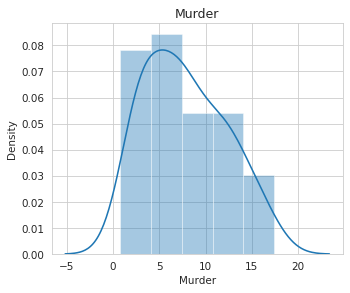

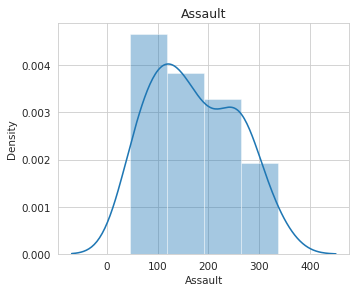

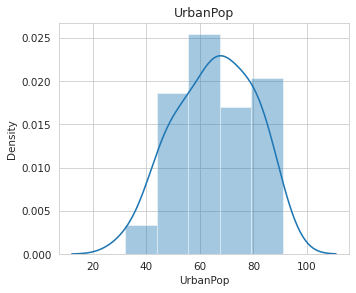

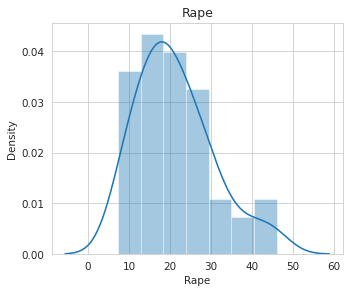

In [9]:
plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['figure.dpi'] = 75


for features in df._get_numeric_data():
  sns.distplot(df[features])
  plt.title(features)
  plt.show()


**2.2 Checking relationship between features**

In [10]:
np.round(df.corr(), 3)

,Murder,Assault,UrbanPop,Rape
Murder,1.000,0.802,0.070,0.564
Assault,0.802,1.000,0.259,0.665
UrbanPop,0.070,0.259,1.000,0.411
Rape,0.564,0.665,0.411,1.000


<Axes: >

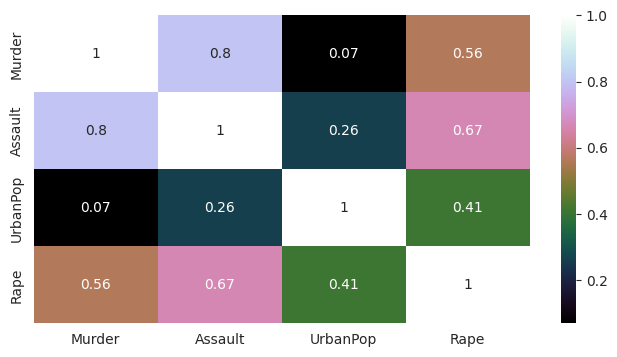

In [11]:
plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['figure.dpi'] = 100

sns.heatmap(np.round(df.corr(), 3), annot = True,  cmap ='cubehelix')

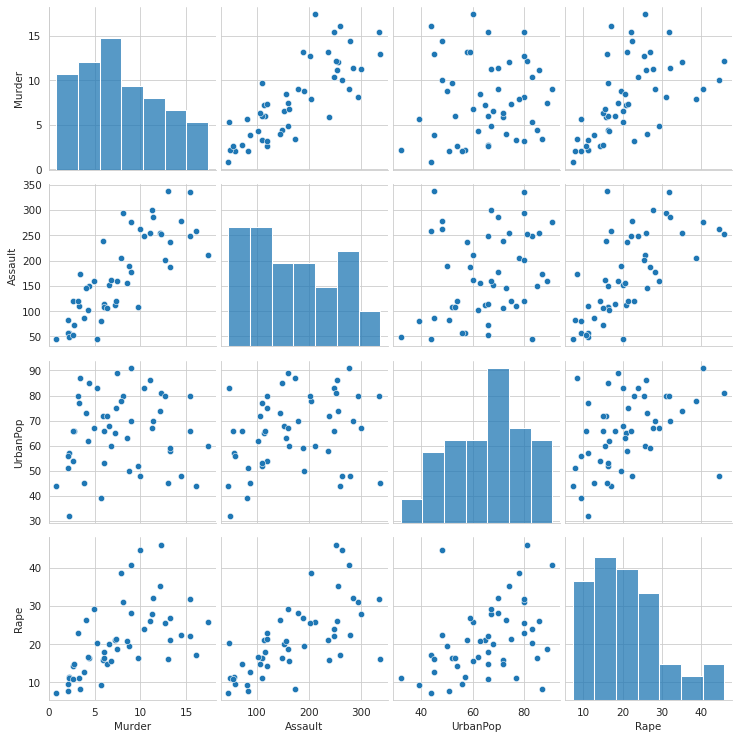

In [12]:
plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['figure.dpi'] = 75

sns.pairplot(df)

**2.3 Data Visualization**

***a. Murder rate***

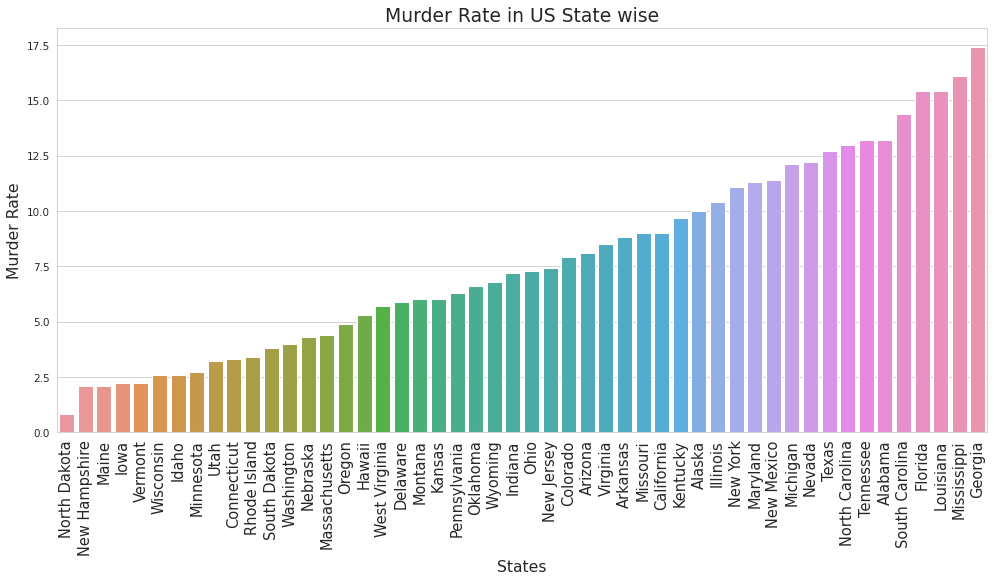

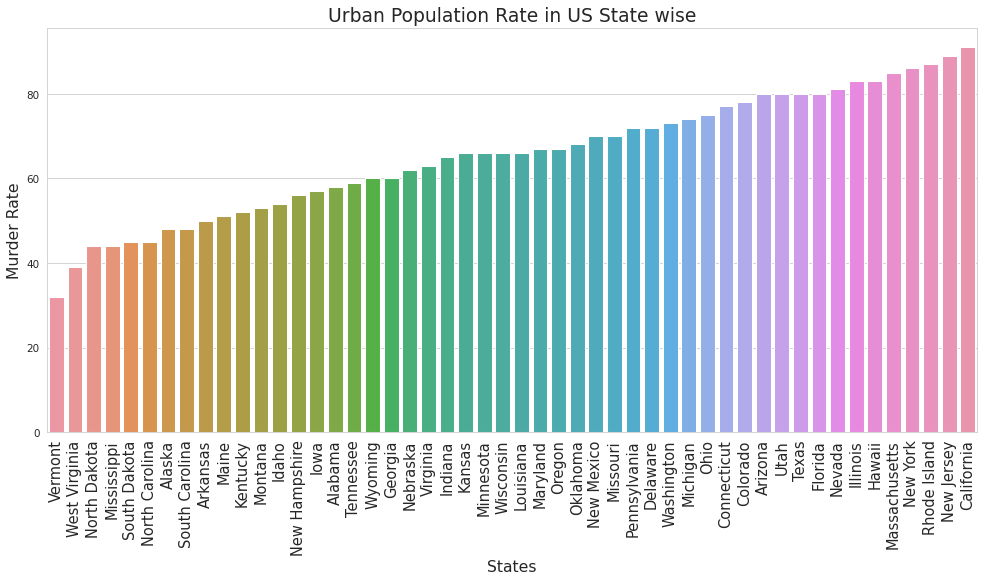

In [13]:
plt.figure(figsize = (16,7))
sns.barplot(x = 'States', y = 'Murder', data = df, order = df.sort_values('Murder').States)

# set labels
plt.xlabel("States", size=15)
plt.ylabel("Murder Rate", size=15)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Murder Rate in US State wise", size=18)
plt.show()

# Compare with statewise Urban population

plt.figure(figsize = (16,7))
sns.barplot(x = 'States', y = 'UrbanPop', data = df, order = df.sort_values('UrbanPop').States)

# set labels
plt.xlabel("States", size=15)
plt.ylabel("Murder Rate", size=15)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Urban Population Rate in US State wise", size=18)
plt.show()

**Observation:** There is no direct relation between Murder Rate and Urban Population but you can see a less number of Murder rate can be seen North Dakota as it Urban population is less compare to Florida and has the opposite effect

In [14]:
print('Top 10 States with Highest Murder Rate')
df.sort_values('Murder',ascending=False).head(10)

Top 10 States with Highest Murder Rate


,States,Murder,Assault,UrbanPop,Rape
9,Georgia,17.4,211,60,25.8
23,Mississippi,16.1,259,44,17.1
8,Florida,15.4,335,80,31.9
17,Louisiana,15.4,249,66,22.2
39,South Carolina,14.4,279,48,22.5
0,Alabama,13.2,236,58,21.2
41,Tennessee,13.2,188,59,26.9
32,North Carolina,13.0,337,45,16.1
42,Texas,12.7,201,80,25.5
27,Nevada,12.2,252,81,46.0


In [15]:
print('Top 10 States with Lowest Murder Rate')
df.sort_values('Murder',ascending=True).head(10)

Top 10 States with Lowest Murder Rate


,States,Murder,Assault,UrbanPop,Rape
33,North Dakota,0.8,45,44,7.3
28,New Hampshire,2.1,57,56,9.5
18,Maine,2.1,83,51,7.8
14,Iowa,2.2,56,57,11.3
44,Vermont,2.2,48,32,11.2
48,Wisconsin,2.6,53,66,10.8
11,Idaho,2.6,120,54,14.2
22,Minnesota,2.7,72,66,14.9
43,Utah,3.2,120,80,22.9
6,Connecticut,3.3,110,77,11.1


In [16]:
df_murder_top10 = df.sort_values('Murder', ascending = False, ignore_index=True)
print('Top 10 States with Highest Murder Rate')
df_murder_top10.head(10)


Top 10 States with Highest Murder Rate


,States,Murder,Assault,UrbanPop,Rape
0,Georgia,17.4,211,60,25.8
1,Mississippi,16.1,259,44,17.1
2,Florida,15.4,335,80,31.9
3,Louisiana,15.4,249,66,22.2
4,South Carolina,14.4,279,48,22.5
5,Alabama,13.2,236,58,21.2
6,Tennessee,13.2,188,59,26.9
7,North Carolina,13.0,337,45,16.1
8,Texas,12.7,201,80,25.5
9,Nevada,12.2,252,81,46.0


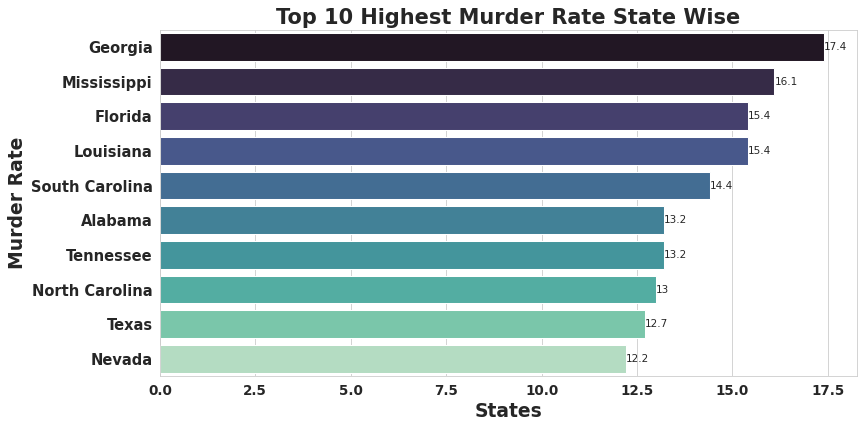

In [17]:
plt.figure(figsize = (12,6))

ax = sns.barplot(x = df_murder_top10.Murder[:10], y = df_murder_top10.States[:10], palette = 'mako')


#set labels
plt.xlabel("States", size=18, fontweight = 'bold')
plt.ylabel("Murder Rate", size=18, fontweight = 'bold')
plt.yticks(fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize = 13, fontweight = 'bold')
plt.title('Top 10 Highest Murder Rate State Wise',  fontsize = 20, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

In [18]:
df_murder_bottom10 = df.sort_values('Murder', ascending = True, ignore_index=True)
print('Bottom 10 States with Lowest Murder Rate')
df_murder_bottom10.head(10)


Bottom 10 States with Lowest Murder Rate


,States,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,New Hampshire,2.1,57,56,9.5
2,Maine,2.1,83,51,7.8
3,Iowa,2.2,56,57,11.3
4,Vermont,2.2,48,32,11.2
5,Wisconsin,2.6,53,66,10.8
6,Idaho,2.6,120,54,14.2
7,Minnesota,2.7,72,66,14.9
8,Utah,3.2,120,80,22.9
9,Connecticut,3.3,110,77,11.1


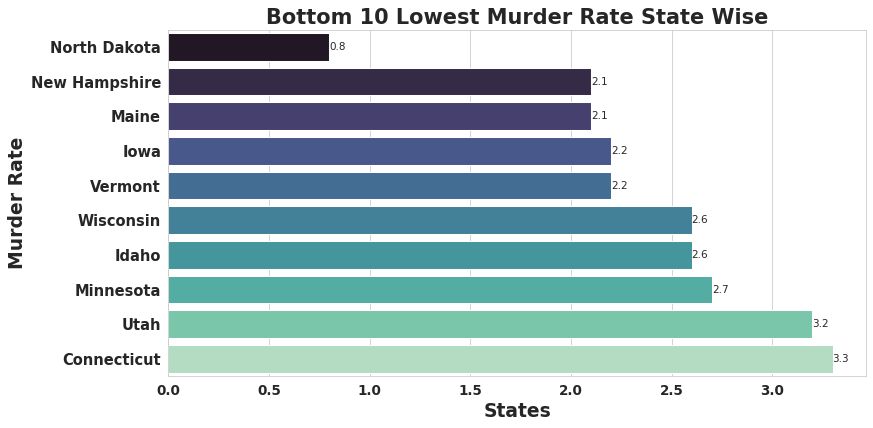

In [19]:
plt.figure(figsize = (12,6))

ax = sns.barplot(x = df_murder_bottom10.Murder[:10], y = df_murder_bottom10.States[:10], palette = 'mako')


#set labels
plt.xlabel("States", size=18, fontweight = 'bold')
plt.ylabel("Murder Rate", size=18, fontweight = 'bold')
plt.yticks(fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize = 13, fontweight = 'bold')
plt.title('Bottom 10 Lowest Murder Rate State Wise',  fontsize = 20, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

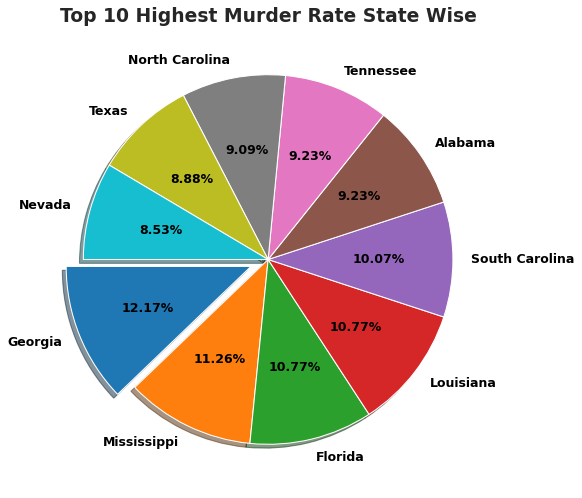

In [20]:
plt.figure(figsize = (8,8))

plt.pie(df_murder_top10.Murder[:10],
       labels=df_murder_top10.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 180,
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'rotation':'horizontal',
                   'color':'black'})
#plt.legend(loc='best')
plt.title("Top 10 Highest Murder Rate State Wise", fontsize = 18, fontweight = 'bold')
plt.show()

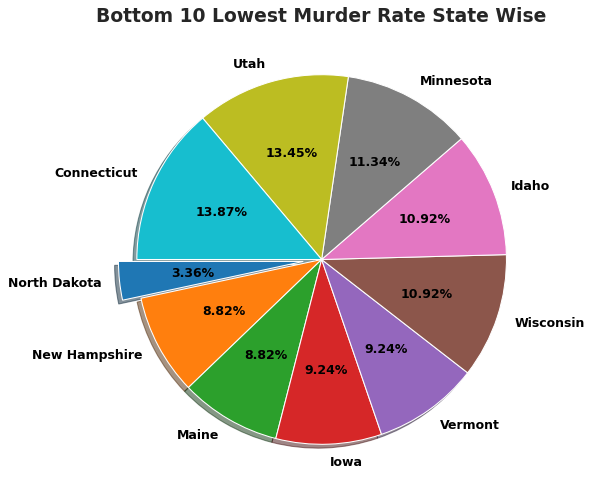

In [21]:
plt.figure(figsize = (8,8))

plt.pie(df_murder_bottom10.Murder[:10],
       labels=df_murder_bottom10.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 180,
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'rotation':'horizontal',
                   'color':'black'})
#plt.legend(loc='best')
plt.title("Bottom 10 Lowest Murder Rate State Wise", fontsize = 18, fontweight = 'bold')
plt.show()

**Observations:**

Highest Murder Rate : Georgia, Missisippi and Florida

Lowest Murder Rate : North Dakota, New Hampshire, Maine, Iowa, Vermont, Wisconsin and Idaho.

***b. Assault rate***

As per the correlation matrix there was 26% correlation between Assualt rate and urban population. Lets check how is the distribution.




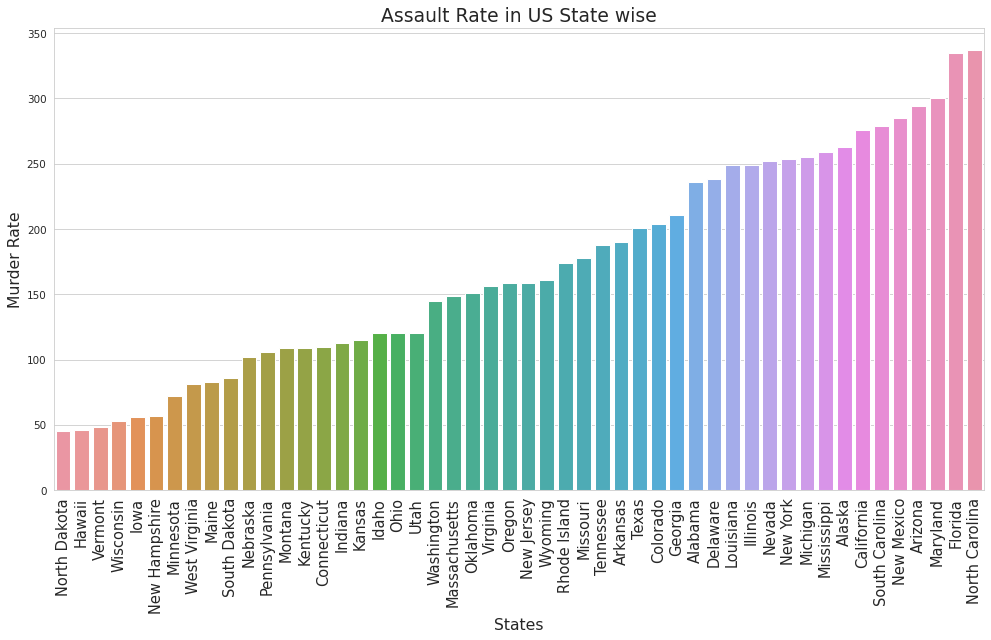

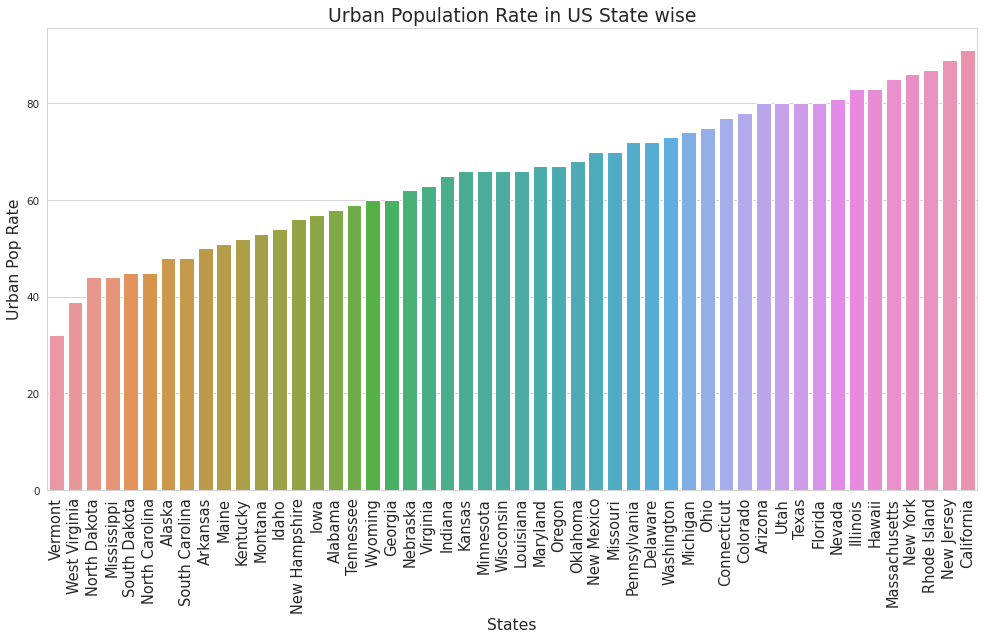

In [22]:
plt.figure(figsize = (16,8))
sns.barplot(x = 'States', y = 'Assault', data = df, order = df.sort_values('Assault').States)

# set labels
plt.xlabel("States", size=15)
plt.ylabel("Murder Rate", size=15)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Assault Rate in US State wise", size=18)
plt.show()

# Compare with statewise Urban population

plt.figure(figsize = (16,8))
sns.barplot(x = 'States', y = 'UrbanPop', data = df, order = df.sort_values('UrbanPop').States)

# set labels
plt.xlabel("States", size=15)
plt.ylabel("Urban Pop Rate", size=15)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Urban Population Rate in US State wise", size=18)
plt.show()

In [23]:
df_assault_top10 = df.sort_values('Assault', ascending = False, ignore_index=True)
print('Top 10 States with Highest Assault Rate')
df_assault_top10.head(10)


Top 10 States with Highest Assault Rate


,States,Murder,Assault,UrbanPop,Rape
0,North Carolina,13.0,337,45,16.1
1,Florida,15.4,335,80,31.9
2,Maryland,11.3,300,67,27.8
3,Arizona,8.1,294,80,31.0
4,New Mexico,11.4,285,70,32.1
5,South Carolina,14.4,279,48,22.5
6,California,9.0,276,91,40.6
7,Alaska,10.0,263,48,44.5
8,Mississippi,16.1,259,44,17.1
9,Michigan,12.1,255,74,35.1


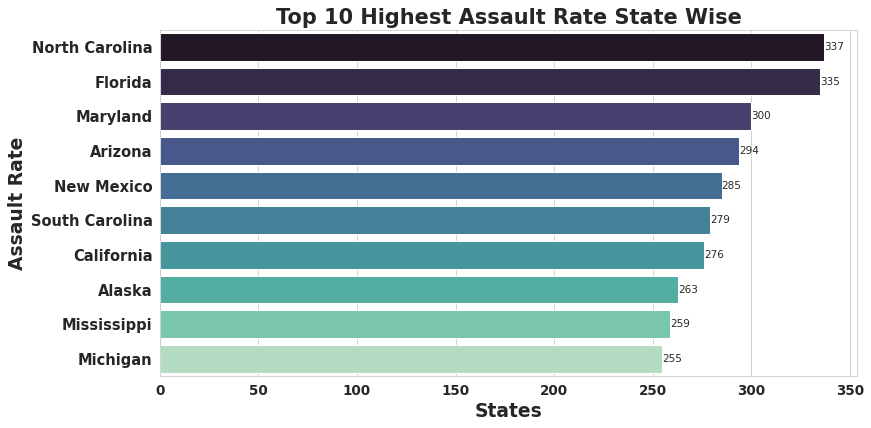

In [24]:
plt.figure(figsize = (12,6))

ax = sns.barplot(x = df_assault_top10.Assault[:10], y = df_assault_top10.States[:10], palette = 'mako')


#set labels
plt.xlabel("States", size=18, fontweight = 'bold')
plt.ylabel("Assault Rate", size=18, fontweight = 'bold')
plt.yticks(fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize = 13, fontweight = 'bold')
plt.title('Top 10 Highest Assault Rate State Wise',  fontsize = 20, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

In [25]:
df_assault_bottom10 = df.sort_values('Assault', ascending = True, ignore_index=True)
print('Bottom 10 States with Lowest Assault Rate')
df_assault_bottom10.head(10)


Bottom 10 States with Lowest Assault Rate


,States,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,Hawaii,5.3,46,83,20.2
2,Vermont,2.2,48,32,11.2
3,Wisconsin,2.6,53,66,10.8
4,Iowa,2.2,56,57,11.3
5,New Hampshire,2.1,57,56,9.5
6,Minnesota,2.7,72,66,14.9
7,West Virginia,5.7,81,39,9.3
8,Maine,2.1,83,51,7.8
9,South Dakota,3.8,86,45,12.8


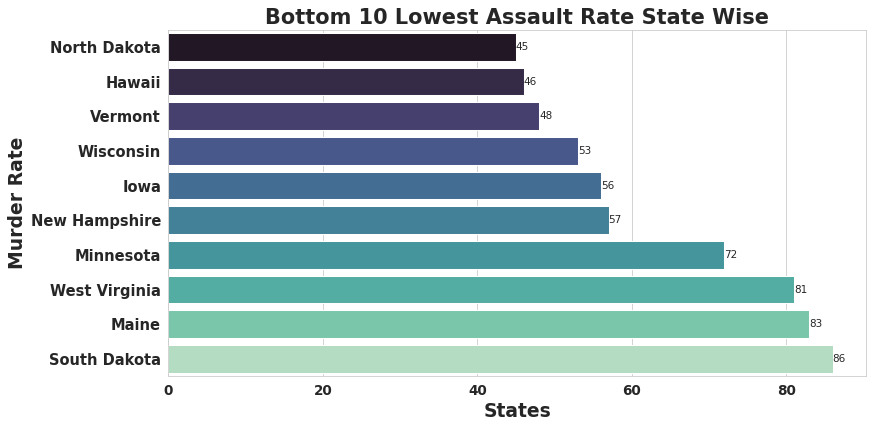

In [26]:
plt.figure(figsize = (12,6))

ax = sns.barplot(x = df_assault_bottom10.Assault[:10], y = df_assault_bottom10.States[:10], palette = 'mako')


#set labels
plt.xlabel("States", size=18, fontweight = 'bold')
plt.ylabel("Murder Rate", size=18, fontweight = 'bold')
plt.yticks(fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize = 13, fontweight = 'bold')
plt.title('Bottom 10 Lowest Assault Rate State Wise',  fontsize = 20, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

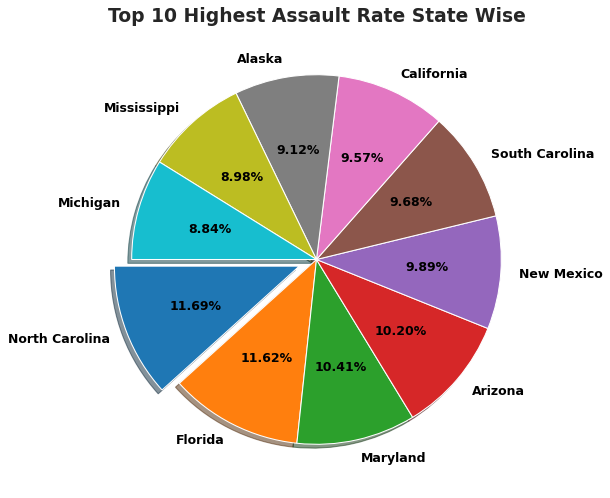

In [27]:
plt.figure(figsize = (8,8))

plt.pie(df_assault_top10.Assault[:10],
       labels=df_assault_top10.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 180,
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'rotation':'horizontal',
                   'color':'black'})
#plt.legend(loc='best')
plt.title("Top 10 Highest Assault Rate State Wise", fontsize = 18, fontweight = 'bold')
plt.show()

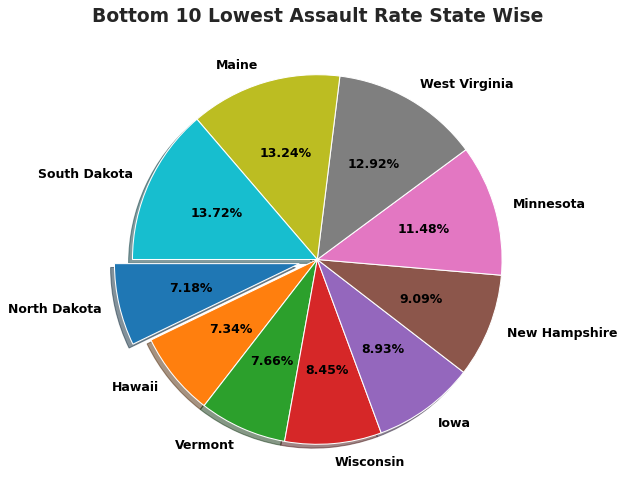

In [28]:
plt.figure(figsize = (8,8))

plt.pie(df_assault_bottom10.Assault[:10],
       labels=df_assault_bottom10.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 180,
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'rotation':'horizontal',
                   'color':'black'})
#plt.legend(loc='best')
plt.title("Bottom 10 Lowest Assault Rate State Wise", fontsize = 18, fontweight = 'bold')
plt.show()

**Observations:**

Highest Assault Rate : North Carolina, Florida and Maryland

Lowest Assault Rate : North Dakota, Hawaii and Vermont.

***c. Rape Rate***

As per the correlation matrix there was 41% correlation between Assualt rate and urban population. Lets check how is the distribution.




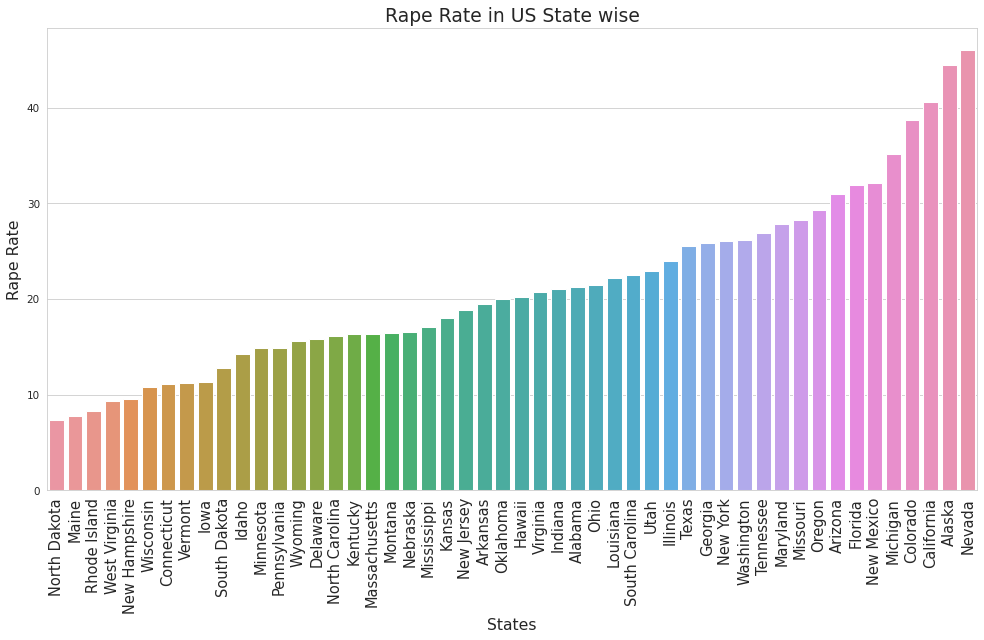

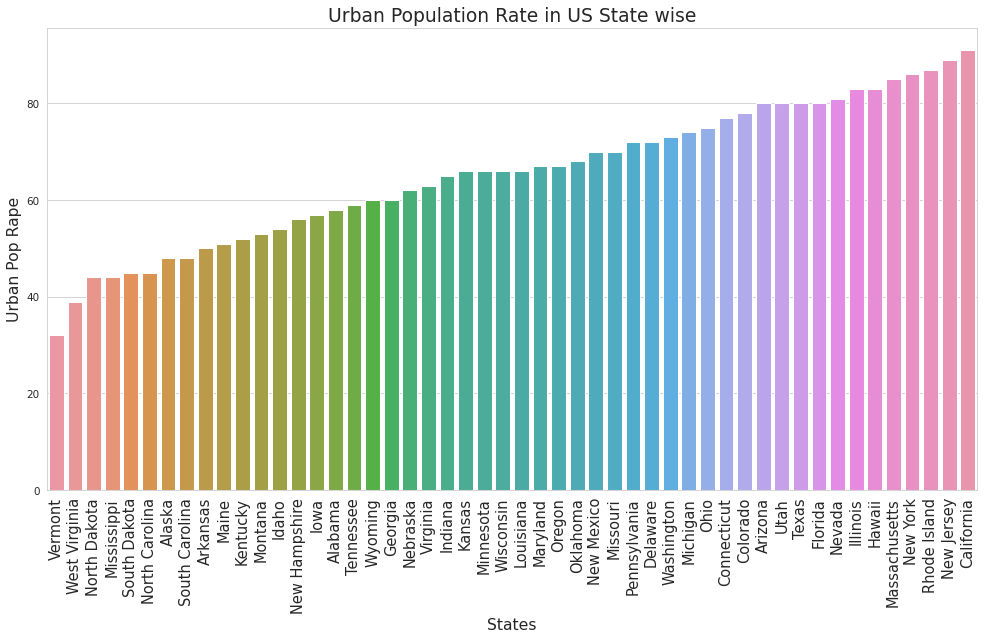

In [29]:
plt.figure(figsize = (16,8))
sns.barplot(x = 'States', y = 'Rape', data = df, order = df.sort_values('Rape').States)

# set labels
plt.xlabel("States", size=15)
plt.ylabel("Rape Rate", size=15)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Rape Rate in US State wise", size=18)
plt.show()

# Compare with statewise Urban population

plt.figure(figsize = (16,8))
sns.barplot(x = 'States', y = 'UrbanPop', data = df, order = df.sort_values('UrbanPop').States)

# set labels
plt.xlabel("States", size=15)
plt.ylabel("Urban Pop Rape", size=15)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Urban Population Rate in US State wise", size=18)
plt.show()

In [30]:
df_rape_top10 = df.sort_values('Rape', ascending = False, ignore_index=True)
print('Top 10 States with Highest Rape Rate')
df_rape_top10.head(10)


Top 10 States with Highest Rape Rate


,States,Murder,Assault,UrbanPop,Rape
0,Nevada,12.2,252,81,46.0
1,Alaska,10.0,263,48,44.5
2,California,9.0,276,91,40.6
3,Colorado,7.9,204,78,38.7
4,Michigan,12.1,255,74,35.1
5,New Mexico,11.4,285,70,32.1
6,Florida,15.4,335,80,31.9
7,Arizona,8.1,294,80,31.0
8,Oregon,4.9,159,67,29.3
9,Missouri,9.0,178,70,28.2


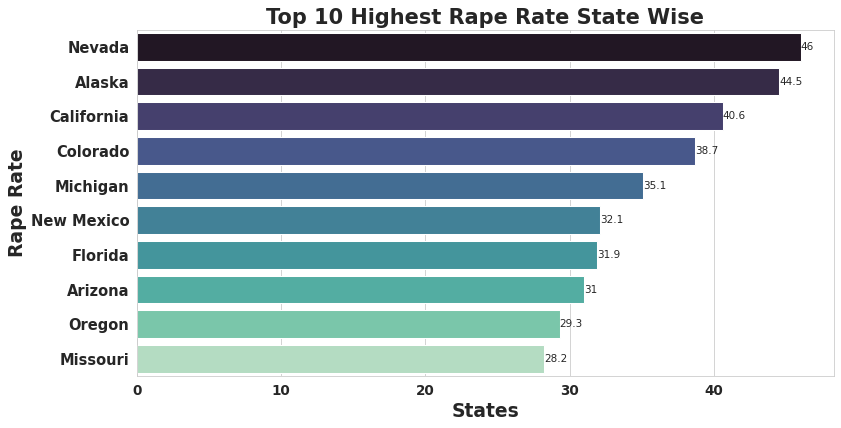

In [31]:
plt.figure(figsize = (12,6))

ax = sns.barplot(x = df_rape_top10.Rape[:10], y = df_rape_top10.States[:10], palette = 'mako')


#set labels
plt.xlabel("States", size=18, fontweight = 'bold')
plt.ylabel("Rape Rate", size=18, fontweight = 'bold')
plt.yticks(fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize = 13, fontweight = 'bold')
plt.title('Top 10 Highest Rape Rate State Wise',  fontsize = 20, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

In [32]:
df_rape_bottom10 = df.sort_values('Rape', ascending = True, ignore_index=True)
print('Bottom 10 States with Lowest Rape Rate')
df_rape_bottom10.head(10)


Bottom 10 States with Lowest Rape Rate


,States,Murder,Assault,UrbanPop,Rape
0,North Dakota,0.8,45,44,7.3
1,Maine,2.1,83,51,7.8
2,Rhode Island,3.4,174,87,8.3
3,West Virginia,5.7,81,39,9.3
4,New Hampshire,2.1,57,56,9.5
5,Wisconsin,2.6,53,66,10.8
6,Connecticut,3.3,110,77,11.1
7,Vermont,2.2,48,32,11.2
8,Iowa,2.2,56,57,11.3
9,South Dakota,3.8,86,45,12.8


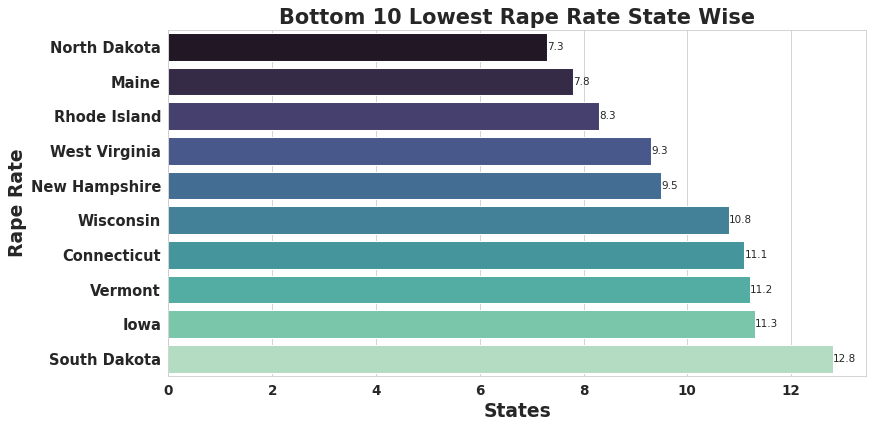

In [33]:
plt.figure(figsize = (12,6))

ax = sns.barplot(x = df_rape_bottom10.Rape[:10], y = df_rape_bottom10.States[:10], palette = 'mako')


#set labels
plt.xlabel("States", size=18, fontweight = 'bold')
plt.ylabel("Rape Rate", size=18, fontweight = 'bold')
plt.yticks(fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize = 13, fontweight = 'bold')
plt.title('Bottom 10 Lowest Rape Rate State Wise',  fontsize = 20, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

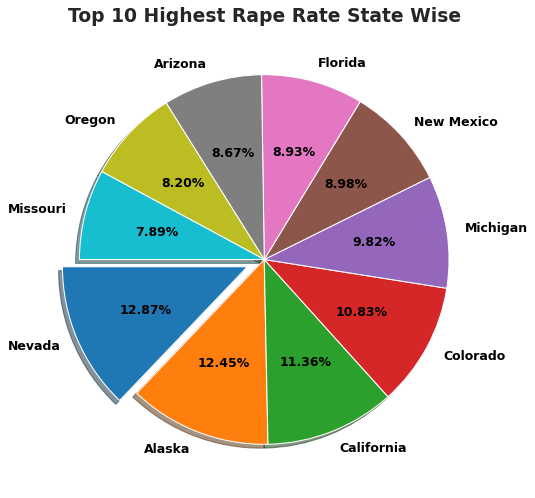

In [34]:
plt.figure(figsize = (8,8))

plt.pie(df_rape_top10.Rape[:10],
       labels=df_rape_top10.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 180,
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'rotation':'horizontal',
                   'color':'black'})
#plt.legend(loc='best')
plt.title("Top 10 Highest Rape Rate State Wise", fontsize = 18, fontweight = 'bold')
plt.show()

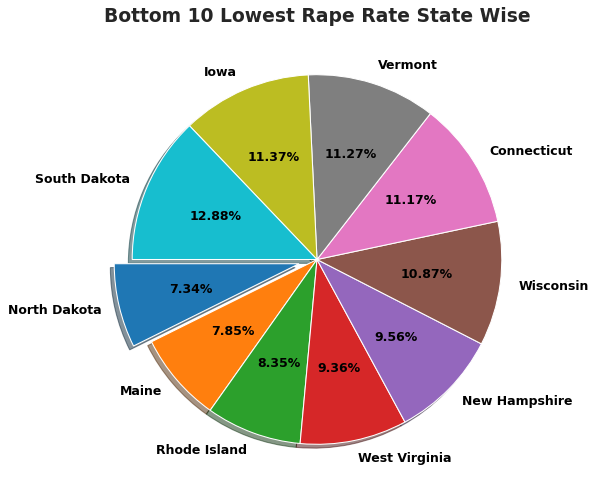

In [35]:
plt.figure(figsize = (8,8))

plt.pie(df_rape_bottom10.Rape[:10],
       labels=df_rape_bottom10.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 180,
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'rotation':'horizontal',
                   'color':'black'})
#plt.legend(loc='best')
plt.title("Bottom 10 Lowest Rape Rate State Wise", fontsize = 18, fontweight = 'bold')
plt.show()

**Observations:**

Highest Rape Rate : Nevada, Alaska and California

Lowest Rape Rate : North Dakota, Maine and Rhode Island.

***d. Urban Population Rate***

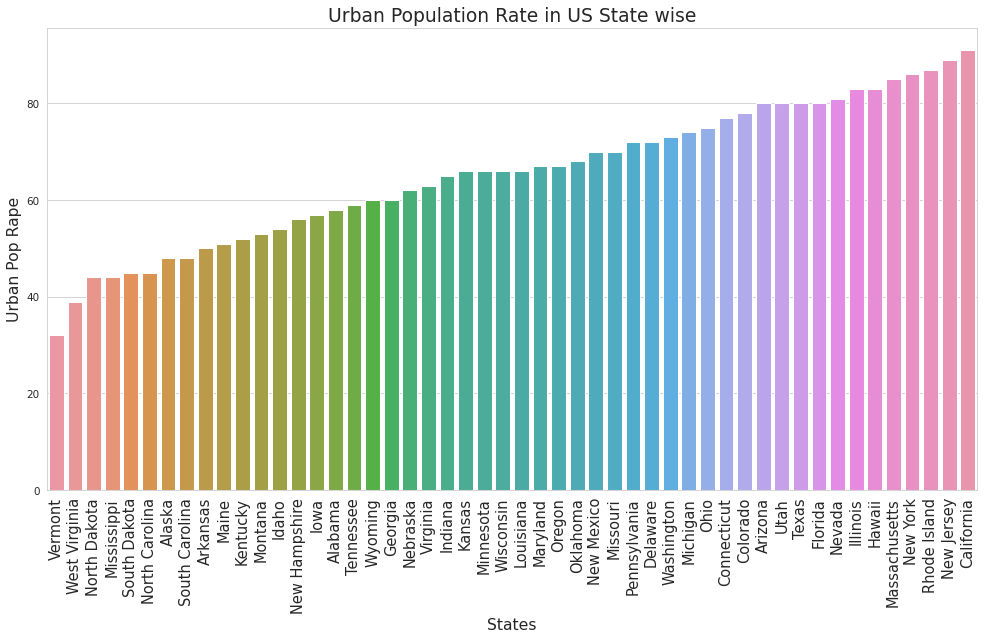

In [36]:
plt.figure(figsize = (16,8))
sns.barplot(x = 'States', y = 'UrbanPop', data = df, order = df.sort_values('UrbanPop').States)

# set labels
plt.xlabel("States", size=15)
plt.ylabel("Urban Pop Rape", size=15)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Urban Population Rate in US State wise", size=18)
plt.show()

In [37]:
df_urbanpop_top10 = df.sort_values('UrbanPop', ascending = False)

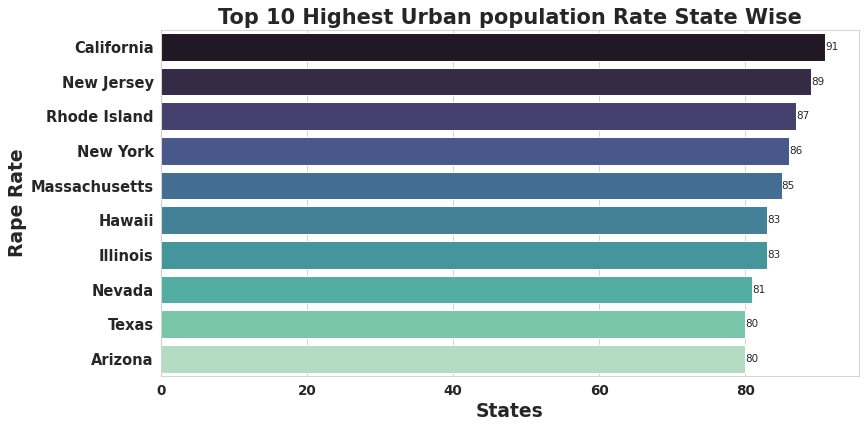

In [38]:
plt.figure(figsize = (12,6))

ax = sns.barplot(x = df_urbanpop_top10.UrbanPop[:10], y = df_urbanpop_top10.States[:10], palette = 'mako')


#set labels
plt.xlabel("States", size=18, fontweight = 'bold')
plt.ylabel("Rape Rate", size=18, fontweight = 'bold')
plt.yticks(fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize = 13, fontweight = 'bold')
plt.title('Top 10 Highest Urban population Rate State Wise',  fontsize = 20, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

In [39]:
df_urbanpop_bottom10 = df.sort_values('UrbanPop', ascending = True)

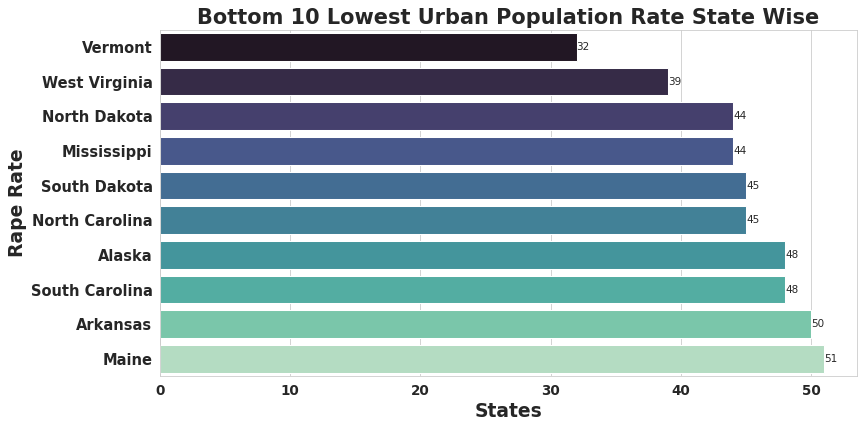

In [40]:
plt.figure(figsize = (12,6))

ax = sns.barplot(x = df_urbanpop_bottom10.UrbanPop[:10], y = df_urbanpop_bottom10.States[:10], palette = 'mako')

#set labels
plt.xlabel("States", size=18, fontweight = 'bold')
plt.ylabel("Rape Rate", size=18, fontweight = 'bold')
plt.yticks(fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize = 13, fontweight = 'bold')
plt.title('Bottom 10 Lowest Urban Population Rate State Wise',  fontsize = 20, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

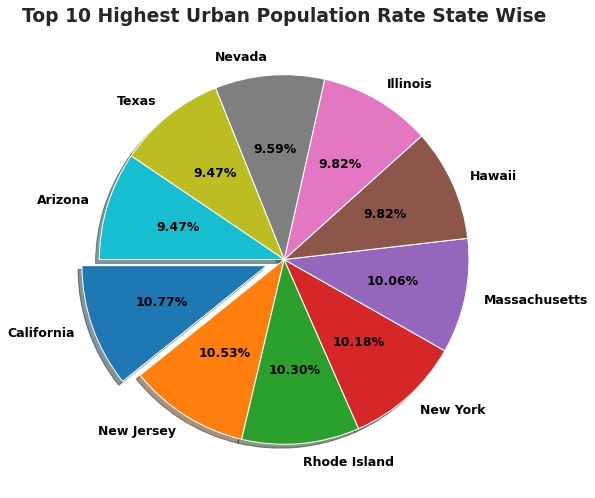

In [41]:
plt.figure(figsize = (8,8))

plt.pie(df_urbanpop_top10.UrbanPop[:10],
       labels=df_urbanpop_top10.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 180,
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'rotation':'horizontal',
                   'color':'black'})
#plt.legend(loc='best')
plt.title("Top 10 Highest Urban Population Rate State Wise", fontsize = 18, fontweight = 'bold')
plt.show()

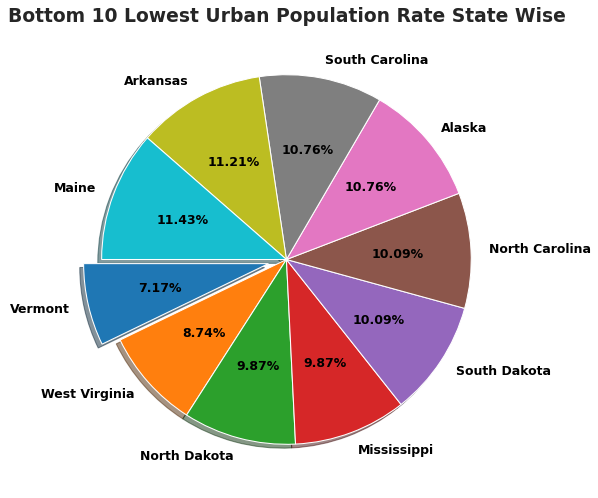

In [42]:
plt.figure(figsize = (8,8))

plt.pie(df_urbanpop_bottom10.UrbanPop[:10],
       labels=df_urbanpop_bottom10.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 180,
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'rotation':'horizontal',
                   'color':'black'})
#plt.legend(loc='best')
plt.title("Bottom 10 Lowest Urban Population Rate State Wise", fontsize = 18, fontweight = 'bold')
plt.show()


**Observations:**

Highest Urban Population Rate : California, New Jersey and Rhode Island.

Lowest Urban Population Rate : Vermount, West Virginia and North Dakota.

**2.4 Outlier Detection**

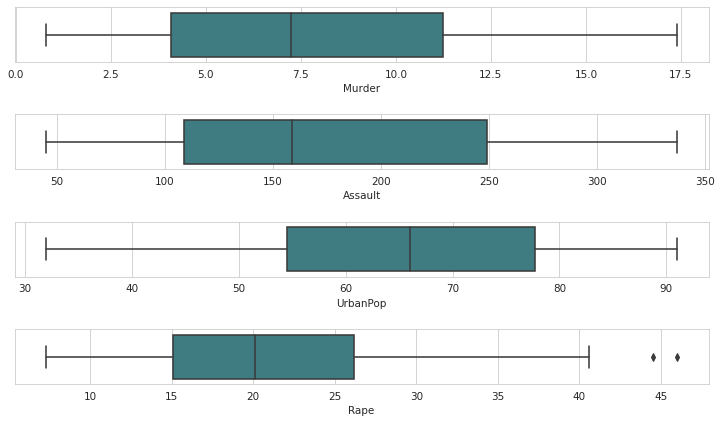

In [43]:
ot=df.copy() 
fig, axes=plt.subplots(4,1,figsize=(10,6),sharex=False,sharey=False)
sns.boxplot(x='Murder',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Assault',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='UrbanPop',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Rape',data=ot,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)


<Axes: >

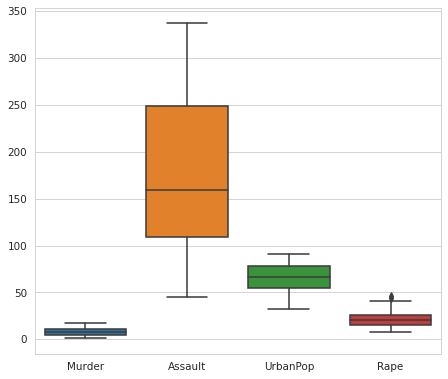

In [44]:
# Box plot for every feature in the same graph
plt.rcParams ['figure.figsize'] =(7, 6)

sns.boxplot(data=df)

In [45]:
data = df.copy()
data = data.drop('States', axis = 1)

<Axes: >

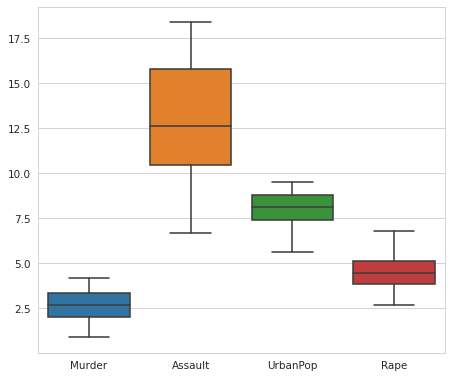

In [46]:
# we use sqrt() to see more clearly despite the outliers

plt.figure(figsize=(7, 6))
sns.boxplot(data=np.sqrt(data))

# **Step 3: Data Preprocessing**


*   In **clustering**, we always deal with distances, so feature scaling is **mandatory**


In [47]:
df.head(2)

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5


**Feature Scaling**


In [48]:
#data = df.copy()
#data = data.drop('States', axis = 1)  #using a dataset that has only numeric cols. since cant convert str in stats col

In [216]:
# Data Transformation
#Standardization

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

std_df = sc.fit_transform(data)


In [217]:
std_df = pd.DataFrame(std_df, columns = data.columns)
std_df.head()

,Murder,Assault,UrbanPop,Rape,Cluster_KM,Cluster_KM1,Cluster_DB,Cluster_DB1
0,1.255179,0.790787,-0.526195,-0.003451,-0.5,1.642857,-1.591912,0.142857
1,0.513019,1.118060,-1.224067,2.509424,-0.5,1.642857,-2.574573,-7.000000
2,0.072361,1.493817,1.009122,1.053466,-0.5,0.750000,-0.609250,0.142857
3,0.234708,0.233212,-1.084492,-0.186794,-0.5,-1.035714,0.373411,0.142857
4,0.281093,1.275635,1.776781,2.088814,-0.5,0.750000,-0.609250,0.142857


In [218]:
#Normalization
# Using Minmaxscaler for accuracy result compariso

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
norm_df = minmax.fit_transform(data)

norm_df = pd.DataFrame(norm_df, columns = data.columns)
norm_df.head()

,Murder,Assault,UrbanPop,Rape,Cluster_KM,Cluster_KM1,Cluster_DB,Cluster_DB1
0,0.746988,0.654110,0.440678,0.359173,0.0,1.000000,0.25,1.0
1,0.554217,0.746575,0.271186,0.961240,0.0,1.000000,0.00,0.0
2,0.439759,0.852740,0.813559,0.612403,0.0,0.666667,0.50,1.0
3,0.481928,0.496575,0.305085,0.315245,0.0,0.000000,0.75,1.0
4,0.493976,0.791096,1.000000,0.860465,0.0,0.666667,0.50,1.0


# **Step 4: Model Building (Performing Clustering)**

# ***Hierachical Clustering***


*   Creation of linkage and dendrogram


In [52]:
plt.rcParams['figure.figsize'] = (14,6)
plt.rcParams['figure.dpi'] = 75

Text(0.5, 1.0, 'Visualising the Standardized data, Method- Complete')

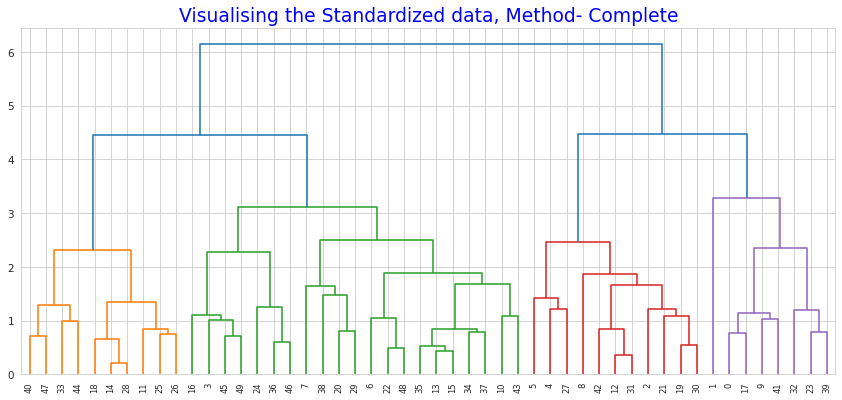

In [53]:
from scipy.cluster import hierarchy
lk = hierarchy.linkage(std_df, method = 'complete')
dendrogram = hierarchy.dendrogram (lk)

plt.title('Visualising the Standardized data, Method- Complete', fontsize = 18, fontweight = 16, color ='blue')

Text(0.5, 1.0, 'Visualising the Standardized data, Method- Average')

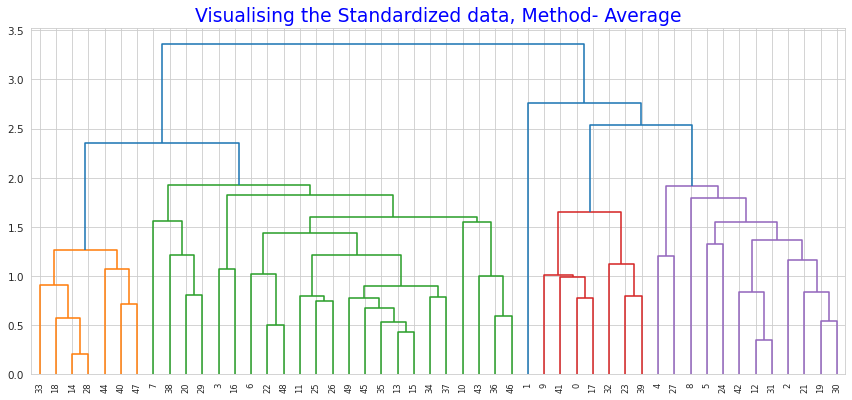

In [54]:
from scipy.cluster import hierarchy
lk = hierarchy.linkage(std_df, method = 'average')
dendrogram = hierarchy.dendrogram (lk)

plt.title('Visualising the Standardized data, Method- Average', fontsize = 18, fontweight = 16, color ='blue')

Text(0.5, 1.0, 'Visualising the Standardized data, Method- Centroid')

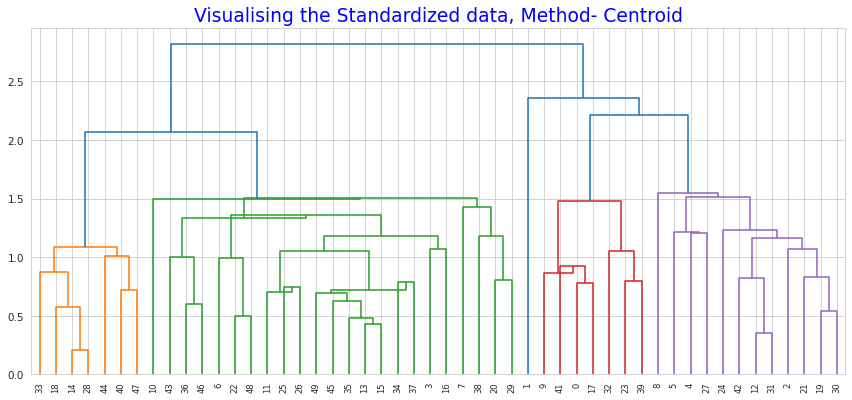

In [55]:
from scipy.cluster import hierarchy
lk = hierarchy.linkage(std_df, method = 'centroid')
dendrogram = hierarchy.dendrogram (lk)

plt.title('Visualising the Standardized data, Method- Centroid', fontsize = 18, fontweight = 16, color ='blue')

The complete dendogram looks firm in standardised data. Lets visualize the normlized data clusters as well.

Text(0.5, 1.0, 'Visualising the Normalized data, Method- Complete')

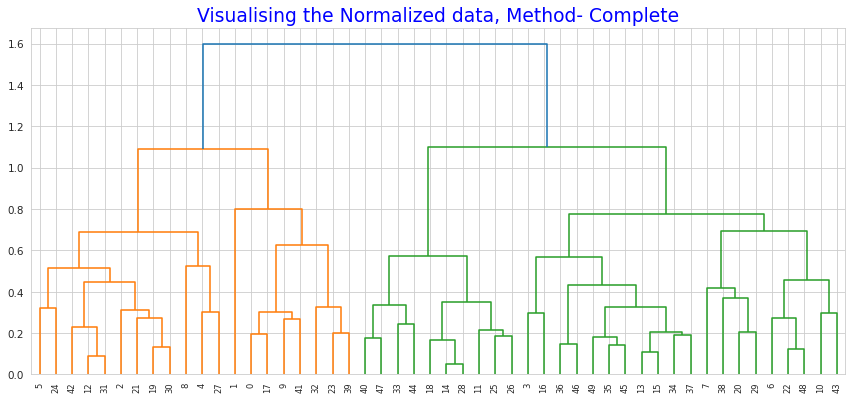

In [56]:
from scipy.cluster import hierarchy
lk = hierarchy.linkage(norm_df, method = 'complete')
dendrogram = hierarchy.dendrogram (lk)

plt.title('Visualising the Normalized data, Method- Complete', fontsize = 18, fontweight = 16, color ='blue')

Text(0.5, 1.0, 'Visualising the Standardized data, Method- Average')

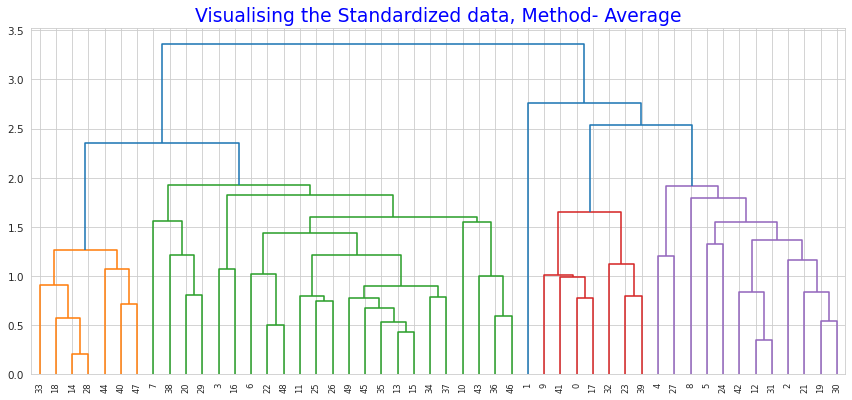

In [57]:
from scipy.cluster import hierarchy
lk = hierarchy.linkage(std_df, method = 'average')
dendrogram = hierarchy.dendrogram (lk)

plt.title('Visualising the Standardized data, Method- Average', fontsize = 18, fontweight = 16, color ='blue')

▶ The complete dendogram looks firm and alike on normalised and standardised data. Also, there is no much in the clusters. I have selected Standardised Complete method dendogram.

Text(0.5, 1.0, 'Visualising the Standardised data, Method- Complete')

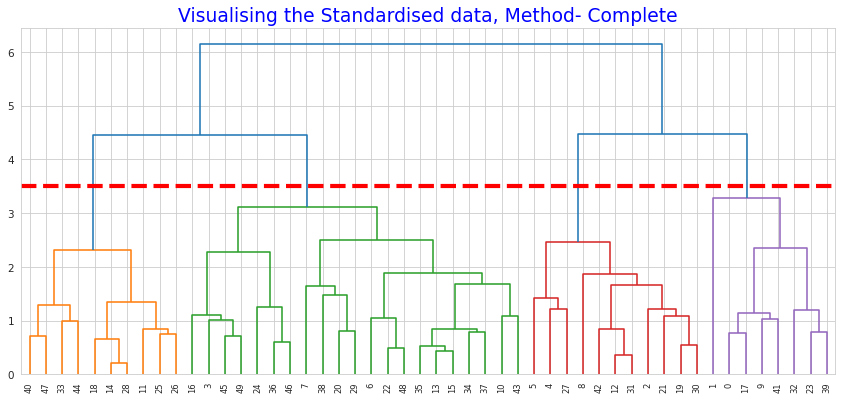

In [58]:
from scipy.cluster import hierarchy
lk = hierarchy.linkage(std_df, method = 'complete')
dendrogram = hierarchy.dendrogram (lk)

plt.axhline (y = 3.5, color = 'r', linestyle = '--', linewidth = 4)

plt.title('Visualising the Standardised data, Method- Complete', fontsize = 18, fontweight = 16, color ='blue')

▶ We are forming 4 clusters here. Lets build the model using 4.

In [59]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering (n_clusters = 4, linkage = 'complete')

cluster_hc = hc.fit_predict(std_df)
cluster_hc

array([0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 1, 1])

In [60]:
#Adding these clusters nums to data

std_df['Cluster_HC'] = cluster_hc

In [61]:
std_df.head(2)

,Murder,Assault,UrbanPop,Rape,Cluster_HC
0,1.255179,0.790787,-0.526195,-0.003451,0
1,0.513019,1.118060,-1.224067,2.509424,0


In [62]:
std_df.groupby('Cluster_HC').agg('mean')

,Murder,Assault,UrbanPop,Rape
Cluster_HC,,,,
0,1.461013,0.993817,-0.840237,0.356494
1,-0.444501,-0.439803,0.364422,-0.285912
2,0.757594,1.131283,0.945679,1.227985
3,-1.068711,-1.115878,-1.133343,-1.035563




*   Cluster 0 - All the crime rates are high with Murder at highest & Urban population is moderate.

*   Cluster 1 - All the crime rates moderate and Urban population is next highest.

*   Cluster 2 - All the crime rates are highest with Murder at next highest and Urban population is highest.

*   Cluster 3 - All the crime rates are lowest and Urban population is also lowest






In [63]:
df['Cluster_HC'] = cluster_hc
df.head(2)

,States,Murder,Assault,UrbanPop,Rape,Cluster_HC
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0


In [64]:
print(df[df.Cluster_HC == 0].shape)
print(df[df.Cluster_HC == 1].shape)
print(df[df.Cluster_HC == 2].shape)
print(df[df.Cluster_HC == 3].shape)

(8, 6)
(21, 6)
(11, 6)
(10, 6)


✈ ***Visualizing the clusters formed:***

<Axes: >

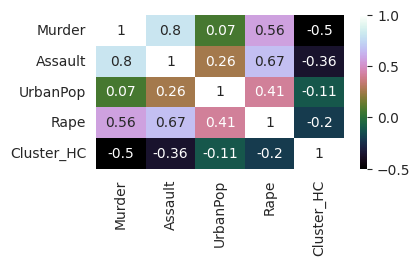

In [65]:
plt.rcParams['figure.figsize'] = (4,2)
plt.rcParams['figure.dpi'] = 100

sns.heatmap(np.round(df.corr(), 3), annot = True,  cmap ='cubehelix')

In [143]:
sns.set_style('darkgrid')

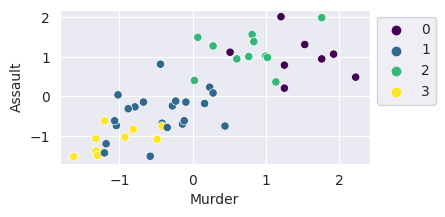

In [144]:
plt.rcParams ['figure.figsize'] =(4,2)
plt.rcParams ['figure.dpi'] = 100


sns.scatterplot(x = 'Murder', y = 'Assault', data=std_df, hue = 'Cluster_HC', palette = 'viridis' )
plt.legend(bbox_to_anchor =(1, 1))

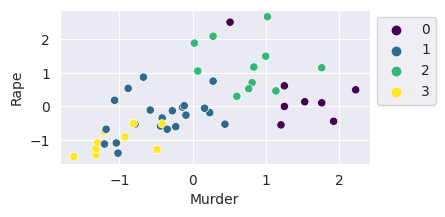

In [145]:
plt.rcParams ['figure.figsize'] =(4,2)
plt.rcParams ['figure.dpi'] = 100

sns.scatterplot(x = 'Murder', y = 'Rape', data=std_df, hue = 'Cluster_HC', palette = 'viridis' )
plt.legend(bbox_to_anchor =(1, 1))

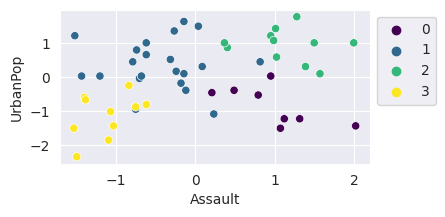

In [146]:
plt.rcParams ['figure.figsize'] =(4,2)
plt.rcParams ['figure.dpi'] = 100

sns.scatterplot(x = 'Assault', y = 'UrbanPop', data=std_df, hue = 'Cluster_HC', palette = 'viridis' )
plt.legend(bbox_to_anchor =(1, 1))

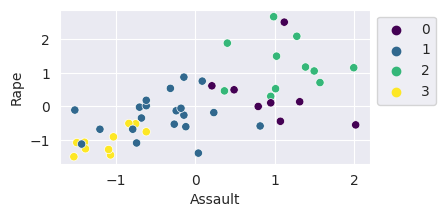

In [147]:
plt.rcParams ['figure.figsize'] =(4,2)
plt.rcParams ['figure.dpi'] = 100

sns.scatterplot(x = 'Assault', y = 'Rape', data=std_df, hue = 'Cluster_HC', palette = 'viridis' )
plt.legend(bbox_to_anchor =(1, 1))

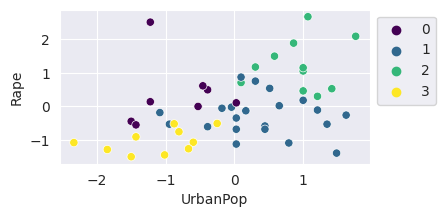

In [148]:
plt.rcParams ['figure.figsize'] =(4,2)
plt.rcParams ['figure.dpi'] = 100

sns.scatterplot(x = 'UrbanPop', y = 'Rape', data=std_df, hue = 'Cluster_HC', palette = 'viridis' )
plt.legend(bbox_to_anchor =(1, 1))

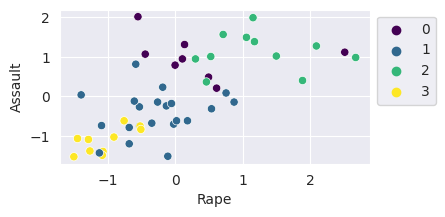

In [149]:
plt.rcParams ['figure.figsize'] =(4,2)
plt.rcParams ['figure.dpi'] = 100

sns.scatterplot(x = 'Rape', y = 'Assault', data=std_df, hue = 'Cluster_HC', palette = 'viridis' )

plt.legend(bbox_to_anchor =(1, 1))

<Axes: xlabel='Cluster_HC', ylabel='Murder'>

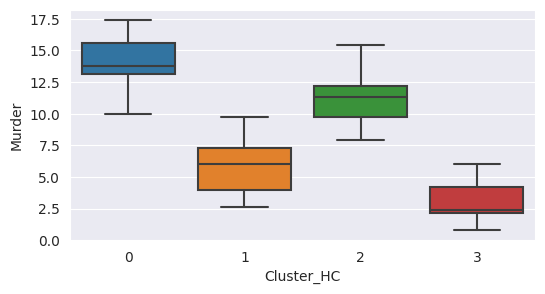

In [150]:
plt.figure(figsize=(6,3))
sns.boxplot(x='Cluster_HC', y='Murder', data=df)


<Axes: xlabel='Cluster_HC', ylabel='Assault'>

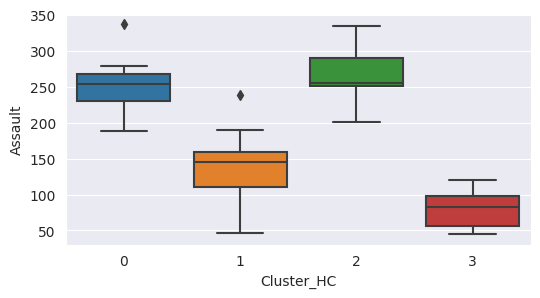

In [151]:
plt.figure(figsize=(6,3))
sns.boxplot(x='Cluster_HC', y='Assault', data=df)


<Axes: xlabel='Cluster_HC', ylabel='Rape'>

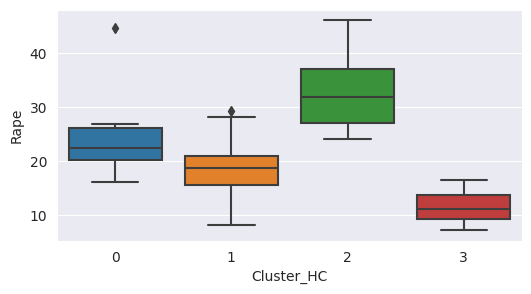

In [152]:
plt.figure(figsize=(6,3))
sns.boxplot(x='Cluster_HC', y='Rape', data=df)


According to Hierarchical Clustering as we can see,

*   The States in Cluster 3 seems to be in Safest-Zone where there are relativley less Murders,Assaults and Rapes
*   The States in Cluster 1 seems to be in little lesser Safe-Zone where there are relativley less Murders,Assaults and Rapes.

*   The States in Cluster 0 (except rape rate) & Cluster 2 seems to have higher crime rates and can be regarded as Danger-Zone.



# ***K Means Clustering***

In [153]:
from sklearn.cluster import KMeans
km = KMeans()                               #default n_cluster formed will be 8 clusters
cluster_km = km.fit_predict(std_df)          #using standardized data
cluster_km

array([5, 0, 6, 1, 3, 3, 4, 4, 6, 5, 4, 2, 6, 1, 2, 1, 1, 5, 2, 6, 4, 6,
       1, 7, 6, 2, 2, 3, 2, 4, 6, 6, 7, 2, 4, 1, 4, 4, 4, 7, 2, 5, 6, 4,
       2, 1, 4, 2, 1, 1], dtype=int32)

In [154]:
wcss = []

for i in range(1,20):
  km = KMeans(n_clusters = i)
  cluster_km = km.fit_predict(std_df)
  wcss.append(km.inertia_)

In [155]:
wcss

[329.54,
 199.87267538475402,
 104.93871462565073,
 62.104872072387025,
 53.15087459742574,
 48.61400870546398,
 43.62183365099841,
 40.85108650550368,
 35.53200180923861,
 31.44275557136927,
 28.533183583225547,
 25.632084218636532,
 23.296485868203998,
 20.739209226001293,
 19.556882755826003,
 18.44178294433933,
 16.307167462659205,
 15.059580797019674,
 13.37289902201164]

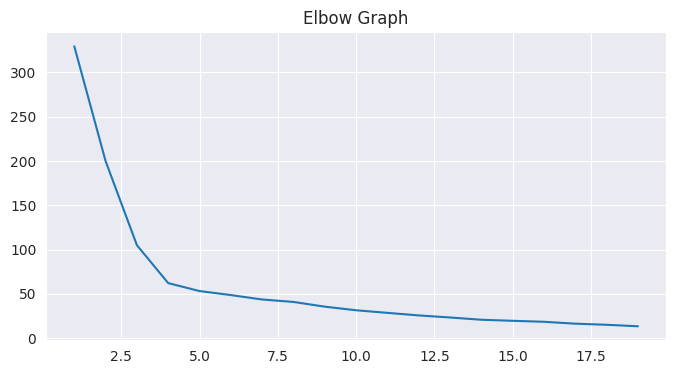

In [156]:
plt.rcParams ['figure.figsize'] =(8,4)
plt.rcParams ['figure.dpi'] = 100
sns.set_style('darkgrid')

plt.plot(range(1,20), wcss)
plt.title('Elbow Graph')
plt.xlabel = 'K Value'
plt.ylabel = 'WCSS'
plt.show()

As we can see, there seems to be turn at 2 and 4. So, lets try the K=2 & K=4

▶ ***When K = 2***

In [157]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters= 2)
cluster1 = km.fit_predict(std_df)            
cluster1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0], dtype=int32)

In [158]:
std_df['Cluster_KM'] = cluster1
std_df.head()

,Murder,Assault,UrbanPop,Rape,Cluster_HC,Cluster_KM,Cluster_KM1
0,1.255179,0.790787,-0.526195,-0.003451,0,0,2
1,0.513019,1.118060,-1.224067,2.509424,0,0,2
2,0.072361,1.493817,1.009122,1.053466,2,0,1
3,0.234708,0.233212,-1.084492,-0.186794,1,0,3
4,0.281093,1.275635,1.776781,2.088814,2,0,1


In [159]:
data['Cluster_KM'] = cluster1

In [160]:
data.groupby('Cluster_KM').agg('mean')

,Murder,Assault,UrbanPop,Rape,Cluster_KM1,Cluster_DB,Cluster_DB1
Cluster_KM,,,,,,,
0,8.94,193.775,69.6,23.6325,2.2,1.275,-0.025
1,3.18,78.700,49.3,11.6300,0.0,3.000,0.000


***Model Evaluation using Silhouette's Score***

In [161]:
from sklearn.metrics import silhouette_score
silhouette_score(std_df, labels = cluster1)

0.46130930640731266

In [162]:
df['Cluster_KM'] = cluster1

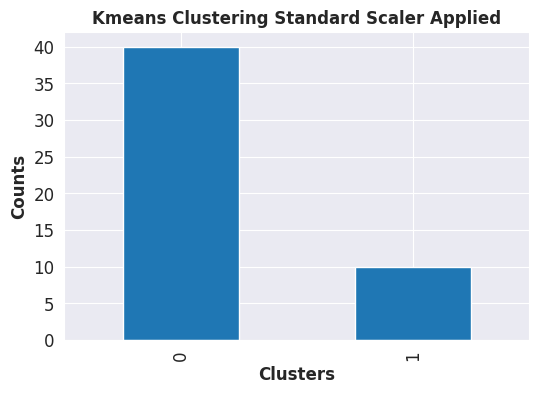

In [163]:
fig,ax = plt.subplots(figsize = (6,4))
df.groupby(['Cluster_KM']).count()['States'].plot(kind ='bar')

plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Counts', fontsize='large', fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [164]:
km.cluster_centers_

array([[ 2.67177849e-01,  2.78969443e-01,  2.83335846e-01,
         2.58890843e-01,  1.07500000e+00,  5.00000000e-01,
         2.20000000e+00],
       [-1.06871140e+00, -1.11587777e+00, -1.13334338e+00,
        -1.03556337e+00,  3.00000000e+00,  1.00000000e+00,
        -2.22044605e-16]])

<Axes: xlabel='Murder', ylabel='Assault'>

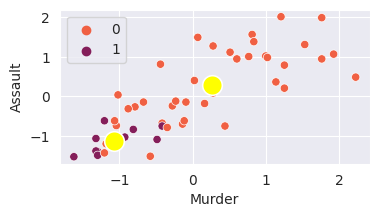

In [165]:
plt.rcParams ['figure.figsize'] =(4,2)
plt.rcParams ['figure.dpi'] = 100

sns.scatterplot(x = 'Murder', y = 'Assault', data = std_df, hue = 'Cluster_KM', palette ='rocket_r')
sns.scatterplot( x= km.cluster_centers_[:,0], y = km.cluster_centers_[:,2], c = 'yellow', s = 200)


<Axes: xlabel='Murder', ylabel='Rape'>

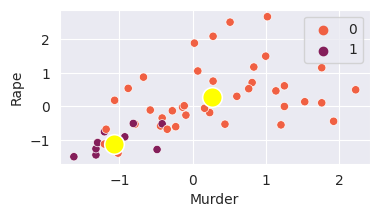

In [166]:
sns.scatterplot(x = 'Murder', y = 'Rape', data = std_df, hue = 'Cluster_KM', palette ='rocket_r')
sns.scatterplot( x= km.cluster_centers_[:,0], y = km.cluster_centers_[:,2], c = 'yellow', s = 200)


<Axes: xlabel='Assault', ylabel='Rape'>

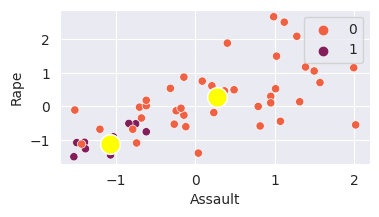

In [167]:
sns.scatterplot(x = 'Assault', y = 'Rape', data = std_df, hue = 'Cluster_KM', palette ='rocket_r')
sns.scatterplot( x= km.cluster_centers_[:,0], y = km.cluster_centers_[:,2], c = 'yellow', s = 200)


<Axes: xlabel='Assault', ylabel='UrbanPop'>

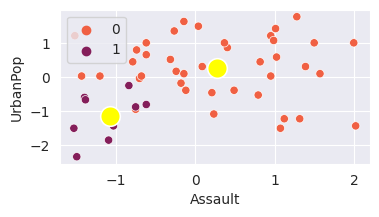

In [168]:
sns.scatterplot(x = 'Assault', y = 'UrbanPop', data = std_df, hue = 'Cluster_KM', palette ='rocket_r')
sns.scatterplot( x= km.cluster_centers_[:,0], y = km.cluster_centers_[:,2], c = 'yellow', s = 200)


<Axes: xlabel='Cluster_KM', ylabel='Murder'>

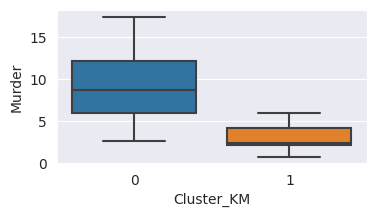

In [169]:
plt.figure(figsize=(4,2))
sns.boxplot(x='Cluster_KM', y='Murder', data=df)


<Axes: xlabel='Cluster_KM', ylabel='Assault'>

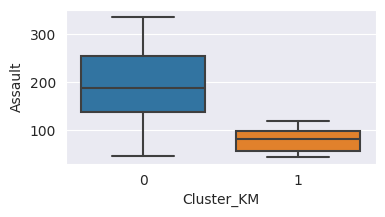

In [170]:
plt.figure(figsize=(4,2))
sns.boxplot(x='Cluster_KM', y='Assault', data=df)


<Axes: xlabel='Cluster_KM', ylabel='Rape'>

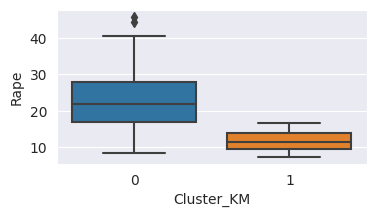

In [171]:
plt.figure(figsize=(4,2))
sns.boxplot(x='Cluster_KM', y='Rape', data=df)


According to KMeans Clustering(K=2) as we can see,

*   The States in Cluster 1 seems to be in Safe-Zone where there are relativley less Murders,Assaults and Rapes
*   The States in Cluster 0 seems to have higher crime rates and can be regarded as Danger-Zone.



▶ ***When K= 4***

In [172]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters= 4)
cluster2 = km.fit_predict(std_df)            
cluster2

array([3, 3, 2, 0, 2, 2, 0, 0, 2, 3, 0, 1, 2, 0, 1, 0, 0, 3, 1, 2, 0, 2,
       0, 3, 2, 1, 1, 2, 1, 0, 2, 2, 3, 1, 0, 0, 0, 0, 0, 3, 1, 3, 2, 0,
       1, 0, 0, 1, 0, 0], dtype=int32)

In [173]:
std_df['Cluster_KM1'] = cluster2
std_df.head()

,Murder,Assault,UrbanPop,Rape,Cluster_HC,Cluster_KM,Cluster_KM1
0,1.255179,0.790787,-0.526195,-0.003451,0,0,3
1,0.513019,1.118060,-1.224067,2.509424,0,0,3
2,0.072361,1.493817,1.009122,1.053466,2,0,2
3,0.234708,0.233212,-1.084492,-0.186794,1,0,0
4,0.281093,1.275635,1.776781,2.088814,2,0,2


In [174]:
data['Cluster_KM1'] = cluster2
data.groupby('Cluster_KM1').agg('mean')

,Murder,Assault,UrbanPop,Rape,Cluster_KM,Cluster_DB,Cluster_DB1
Cluster_KM1,,,,,,,
0,5.715000,132.300000,70.800000,18.1000,0.0,2.000,0.000
1,3.180000,78.700000,49.300000,11.6300,1.0,3.000,0.000
2,10.883333,256.916667,78.333333,32.2500,0.0,1.000,0.000
3,14.087500,252.750000,53.500000,24.5375,0.0,-0.125,-0.125


***Model Evaluation using Silhouette's Score***

In [175]:
from sklearn.metrics import silhouette_score
silhouette_score(std_df, labels = cluster2)

0.5350946175691143

In [176]:
df['Cluster_KM1'] = cluster2

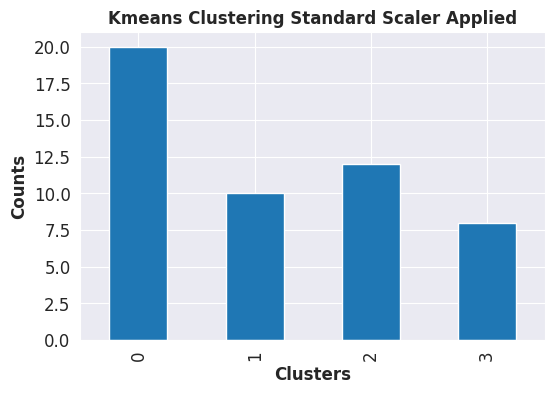

In [177]:
fig,ax = plt.subplots(figsize = (6,4))
df.groupby(['Cluster_KM1']).count()['States'].plot(kind ='bar')

plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Counts', fontsize='large', fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [178]:
km.cluster_centers_

array([[-4.80780974e-01, -4.66181394e-01,  3.67080431e-01,
        -3.37782178e-01,  1.00000000e+00, -5.55111512e-17,
         3.00000000e+00],
       [-1.06871140e+00, -1.11587777e+00, -1.13334338e+00,
        -1.03556337e+00,  3.00000000e+00,  1.00000000e+00,
        -2.22044605e-16],
       [ 7.17885853e-01,  1.04432228e+00,  8.92810325e-01,
         1.18827715e+00,  1.91666667e+00,  2.77555756e-17,
         1.00000000e+00],
       [ 1.46101290e+00,  9.93817277e-01, -8.40237336e-01,
         3.56493930e-01,  0.00000000e+00,  2.77555756e-17,
         2.00000000e+00]])

<Axes: xlabel='Murder', ylabel='UrbanPop'>

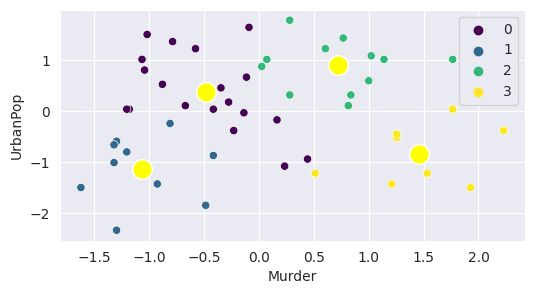

In [179]:
plt.rcParams ['figure.figsize'] =(6,3)
plt.rcParams ['figure.dpi'] = 100

sns.scatterplot(x = 'Murder', y = 'UrbanPop', data = std_df, hue = 'Cluster_KM1', palette ='viridis')
sns.scatterplot( x= km.cluster_centers_[:,0], y = km.cluster_centers_[:,2], c = 'yellow', s = 200)


<Axes: xlabel='Assault', ylabel='UrbanPop'>

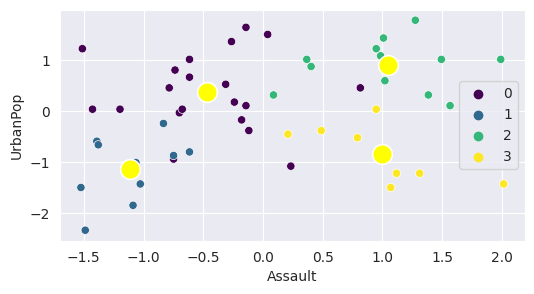

In [180]:

sns.scatterplot(x = 'Assault', y = 'UrbanPop', data = std_df, hue = 'Cluster_KM1', palette ='viridis')
sns.scatterplot( x= km.cluster_centers_[:,1], y = km.cluster_centers_[:,2], c = 'yellow', s = 200)


<Axes: xlabel='Rape', ylabel='UrbanPop'>

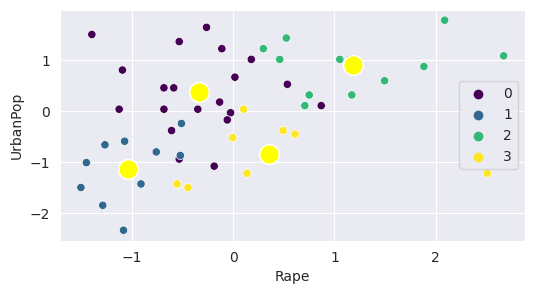

In [181]:

sns.scatterplot(x = 'Rape', y = 'UrbanPop', data = std_df, hue = 'Cluster_KM1', palette ='viridis')
sns.scatterplot( x= km.cluster_centers_[:,3], y = km.cluster_centers_[:,2], c = 'yellow', s = 200)


<Axes: xlabel='Murder', ylabel='Assault'>

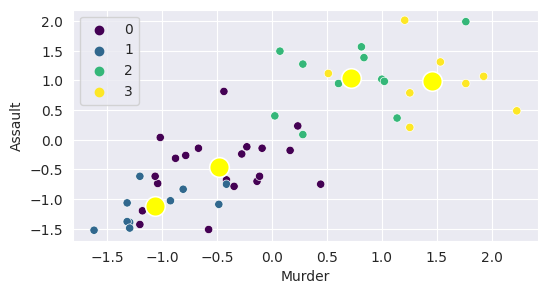

In [182]:

sns.scatterplot(x = 'Murder', y = 'Assault', data = std_df, hue = 'Cluster_KM1', palette ='viridis')
sns.scatterplot( x= km.cluster_centers_[:,0], y = km.cluster_centers_[:,1], c = 'yellow', s = 200)


<Axes: xlabel='Murder', ylabel='Rape'>

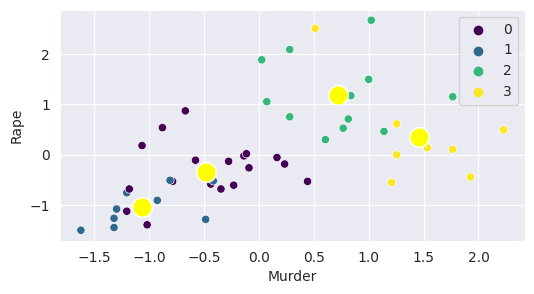

In [183]:

sns.scatterplot(x = 'Murder', y = 'Rape', data = std_df, hue = 'Cluster_KM1', palette ='viridis')
sns.scatterplot( x= km.cluster_centers_[:,0], y = km.cluster_centers_[:,3], c = 'yellow', s = 200)


<Axes: xlabel='Cluster_KM1', ylabel='Murder'>

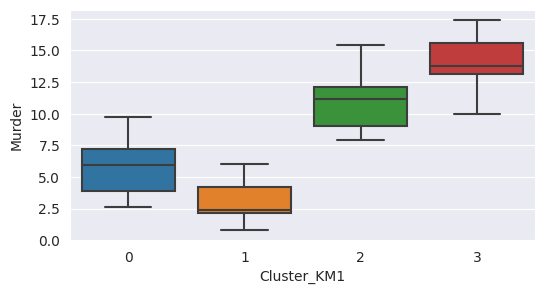

In [184]:
plt.figure(figsize=(6,3))
sns.boxplot(x='Cluster_KM1', y='Murder', data=df)


<Axes: xlabel='Cluster_KM1', ylabel='Assault'>

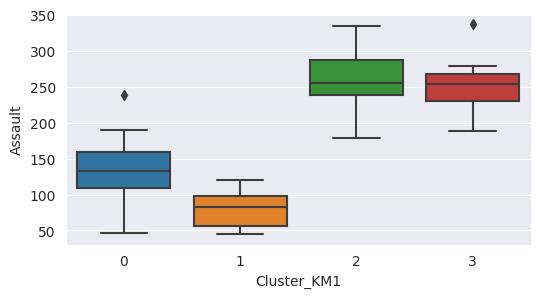

In [185]:
plt.figure(figsize=(6,3))
sns.boxplot(x='Cluster_KM1', y='Assault', data=df)


<Axes: xlabel='Cluster_KM1', ylabel='Rape'>

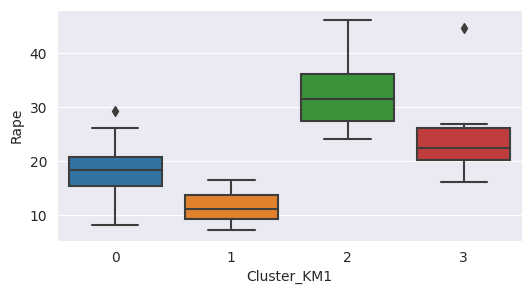

In [186]:
plt.figure(figsize=(6,3))
sns.boxplot(x='Cluster_KM1', y='Rape', data=df)


According to KMeans Clustering (K=4) as we can see,

*   The States in Cluster 0 & Cluster 1 seems to be in Safe-Zone where there are relativley less Murders,Assaults and Rapes
*   The States in Cluster 2 (except rape rate) & 3 seems to have higher crime rates and can be regarded as Danger-Zone.



# ***DBSCAN***

In [219]:
#Model Building

from sklearn.cluster import DBSCAN
db = DBSCAN()                            ## Default epsilon = 0.5, MinPts = 5
cluster_db = db.fit_predict(norm_df)
cluster_db

array([ 0, -1,  1,  2,  1,  1,  2,  2,  1,  0,  2,  3,  1,  2,  3,  2,  2,
        0,  3,  1,  2,  1,  2,  0,  1,  3,  3,  1,  3,  2,  1,  1,  0,  3,
        2,  2,  2,  2,  2,  0,  3,  0,  1,  2,  3,  2,  2,  3,  2,  2])


*   In DBSCAN, **-1** depicts outlier.
*   0,1,2,3,etc.. are the cluster formed. Here only 1 cluster is formed so only 0 is seen.

Here everything is shown as outlier. So lets find the optimal eps value and min sample to form clusters.

***Using Standardised Data***

In [220]:
from sklearn.cluster import DBSCAN
db1 = DBSCAN(eps=1.8, min_samples=3)
cluster_db1 = db1.fit_predict(std_df)
cluster_db1

array([ 0, -1,  1,  2,  1,  1,  2,  2,  1,  0,  2,  3,  1,  2,  3,  2,  2,
        0,  3,  1,  2,  1,  2,  0,  1,  3,  3,  1,  3,  2,  1,  1,  0,  3,
        2,  2,  2,  2,  2,  0,  3,  0,  1,  2,  3,  2,  2,  3,  2,  2])

In [221]:
silhouette_score(std_df, labels = cluster_db1)

0.527022270044963

Max accuracy found was when eps value = 1.8 & min_Sample = 3 which is, 53.4% using the standardised data. Number of Clusters formed is 7

In [222]:
data['Cluster_DB'] = cluster_db1
data.groupby('Cluster_DB').agg('mean')

,Murder,Assault,UrbanPop,Rape,Cluster_KM,Cluster_KM1,Cluster_DB1
Cluster_DB,,,,,,,
-1,10.000000,263.000000,48.000000,44.500000,0.0,3.0,-1.0
0,14.671429,251.285714,54.285714,21.685714,0.0,3.0,0.0
1,10.883333,256.916667,78.333333,32.250000,0.0,2.0,0.0
2,5.715000,132.300000,70.800000,18.100000,0.0,0.0,0.0
3,3.180000,78.700000,49.300000,11.630000,1.0,1.0,0.0


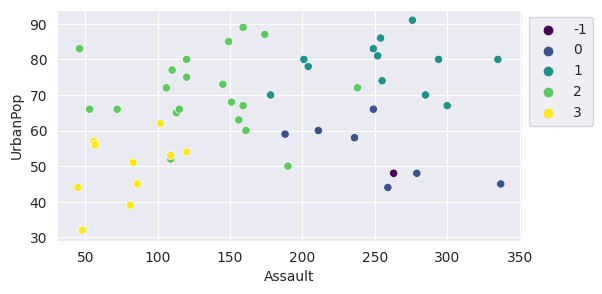

In [223]:

sns.scatterplot(x = 'Assault', y = 'UrbanPop', data = data, hue = 'Cluster_DB', palette ='viridis')
plt.legend(bbox_to_anchor = (1,1))

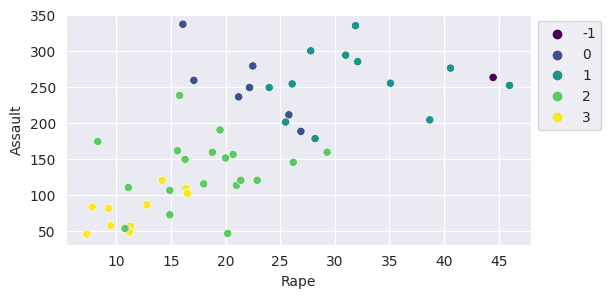

In [193]:

sns.scatterplot(x = 'Rape', y = 'Assault', data = data, hue = 'Cluster_DB', palette ='viridis')
plt.legend(bbox_to_anchor = (1,1))

▶ The clusters formed does't look redunctant. Lets try on normalised data.

***Using Normalised Data***

In [224]:
from sklearn.cluster import DBSCAN
db1 = DBSCAN(eps=0.5, min_samples=5)
cluster_db2 = db1.fit_predict(norm_df)
cluster_db2

array([ 0, -1,  1,  2,  1,  1,  2,  2,  1,  0,  2,  3,  1,  2,  3,  2,  2,
        0,  3,  1,  2,  1,  2,  0,  1,  3,  3,  1,  3,  2,  1,  1,  0,  3,
        2,  2,  2,  2,  2,  0,  3,  0,  1,  2,  3,  2,  2,  3,  2,  2])

In [225]:
silhouette_score(norm_df, labels = cluster_db2)

0.5835699717375399

In [206]:
#e=0.2 , ms=5 --- acc 0.172
#e=0.3 , ms=4 --- acc 0.468
#e=0.3 , ms=5 --- acc 0.562
#e=0.4 , ms=4 --- acc 0.635
#e=0.4 , ms=5 --- acc 0.635
#e=0.4 , ms=6 --- acc 0.621
#e=0.5 , ms=5 --- acc 0.583

In [228]:
data['Cluster_DB1'] = cluster_db2
data.head()

,Murder,Assault,UrbanPop,Rape,Cluster_KM,Cluster_KM1,Cluster_DB,Cluster_DB1
0,13.2,236,58,21.2,0,3,0,0
1,10.0,263,48,44.5,0,3,-1,-1
2,8.1,294,80,31.0,0,2,1,1
3,8.8,190,50,19.5,0,0,2,2
4,9.0,276,91,40.6,0,2,1,1


In [229]:
data.groupby('Cluster_DB1').agg('mean')

,Murder,Assault,UrbanPop,Rape,Cluster_KM,Cluster_KM1,Cluster_DB
Cluster_DB1,,,,,,,
-1,10.000000,263.000000,48.000000,44.500000,0.0,3.0,-1.0
0,14.671429,251.285714,54.285714,21.685714,0.0,3.0,0.0
1,10.883333,256.916667,78.333333,32.250000,0.0,2.0,1.0
2,5.715000,132.300000,70.800000,18.100000,0.0,0.0,2.0
3,3.180000,78.700000,49.300000,11.630000,1.0,1.0,3.0


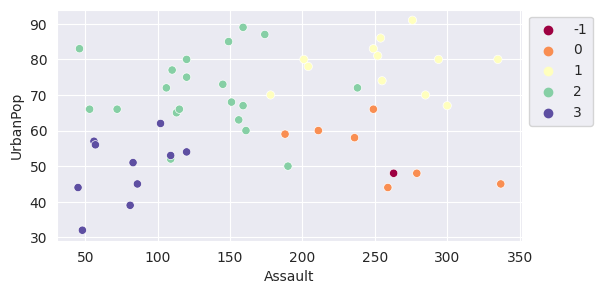

In [230]:

sns.scatterplot(x = 'Assault', y = 'UrbanPop', data = data, hue = 'Cluster_DB1', palette ='Spectral')
plt.legend(bbox_to_anchor = (1,1))

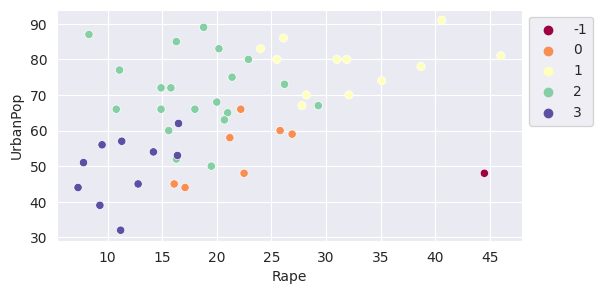

In [231]:

sns.scatterplot(x = 'Rape', y = 'UrbanPop', data = data, hue = 'Cluster_DB1', palette ='Spectral')
plt.legend(bbox_to_anchor = (1,1))

 We have tried different values for eps value and min_sample on both Standardised and Normalised data to form optimal clusters, but the silhoutte score is not exceeding 63%. Lets put a pivot for all the eps values and min sample values and check if that's the max accuracy we can get.

**DBSCAN evaluation using standardized data:**

In [232]:
from itertools import product

eps_values = np.arange(1,3,0.25)                                 # eps values to be investigated
min_samples = np.arange(3,6)                                  # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))
DBSCAN_params

[(1.0, 3),
 (1.0, 4),
 (1.0, 5),
 (1.25, 3),
 (1.25, 4),
 (1.25, 5),
 (1.5, 3),
 (1.5, 4),
 (1.5, 5),
 (1.75, 3),
 (1.75, 4),
 (1.75, 5),
 (2.0, 3),
 (2.0, 4),
 (2.0, 5),
 (2.25, 3),
 (2.25, 4),
 (2.25, 5),
 (2.5, 3),
 (2.5, 4),
 (2.5, 5),
 (2.75, 3),
 (2.75, 4),
 (2.75, 5)]

In [233]:
no_of_clusters = []
sil_score = []

for i in DBSCAN_params:
    db = DBSCAN(eps = i[0], min_samples = i[1])
    db_cluster = db.fit(std_df)
    no_of_clusters.append(len(np.unique(db_cluster.labels_)))
    sil_score.append(silhouette_score(std_df, db_cluster.labels_))

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


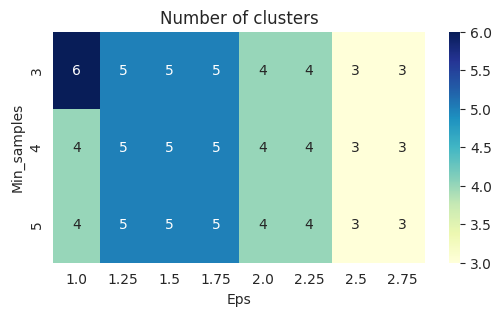

In [234]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   #creating dataframe for eps & min_samples combinations 

tmp['No_of_clusters'] = no_of_clusters                                            #including no.of cluster in the tmp dataframe

pivot_std = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')        #creating a pivot table

fig, ax = plt.subplots(figsize=(6,3))

sns.heatmap(pivot_std, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)                       #heatmap of pivot table    

ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.' )
plt.show()



A heatplot below shows Silhoutte Score genreated by the algorithm for the respective parameters combinations.


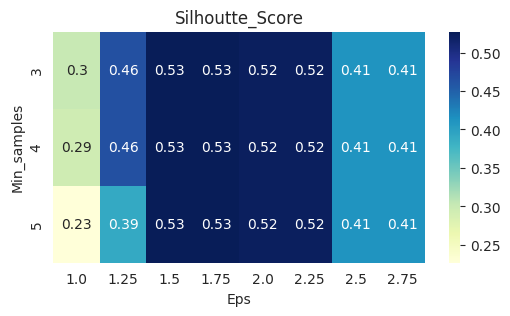

In [252]:
tmp['Silhoutte_Score'] = sil_score                                           #including silhoutte score in the tmp dataframe

pivot_std = pd.pivot_table(tmp, values='Silhoutte_Score', index='Min_samples', columns='Eps')    #creating pivot

fig, ax = plt.subplots(figsize=(6,3))

sns.heatmap(pivot_std, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)              #creating heatmap

ax.set_title('Silhoutte_Score')
print('A heatplot below shows Silhoutte Score genreated by the algorithm for the respective parameters combinations.' )
plt.show()

**DBSCAN evaluation using normalized data:**

In [237]:
from itertools import product

eps_values = np.arange(0.2,0.5,0.1)                                 # eps values to be investigated
min_samples = np.arange(3,6)                                  # min_samples values to be investigated

DBSCAN_params1 = list(product(eps_values, min_samples))
DBSCAN_params1


[(0.2, 3),
 (0.2, 4),
 (0.2, 5),
 (0.30000000000000004, 3),
 (0.30000000000000004, 4),
 (0.30000000000000004, 5),
 (0.4000000000000001, 3),
 (0.4000000000000001, 4),
 (0.4000000000000001, 5)]

In [238]:
no_of_clusters1 = []
sil_score1 = []

for i in DBSCAN_params1:
    db = DBSCAN(eps = i[0], min_samples = i[1])
    db_cluster1 = db.fit(norm_df)
    no_of_clusters1.append(len(np.unique(db_cluster1.labels_)))
    sil_score1.append(silhouette_score(norm_df, db_cluster1.labels_))

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


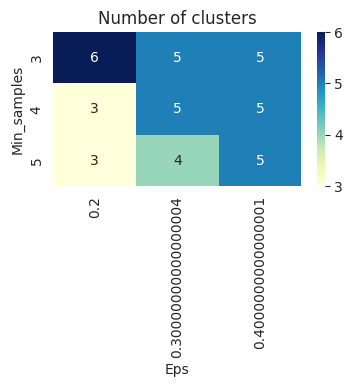

In [239]:
tmp1 = pd.DataFrame.from_records(DBSCAN_params1, columns =['Eps', 'Min_samples'])   #creating dataframe for eps & min_samples combinations 

tmp1['No_of_clusters'] = no_of_clusters1                                            #including no.of cluster in the tmp dataframe

pivot_norm = pd.pivot_table(tmp1, values='No_of_clusters', index='Min_samples', columns='Eps')        #creating a pivot table

fig, ax = plt.subplots(figsize=(4,2))

sns.heatmap(pivot_norm, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)                       #heatmap of pivot table    

ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.' )
plt.show()


A heatplot below shows Silhoutte Score genreated by the algorithm for the respective parameters combinations.


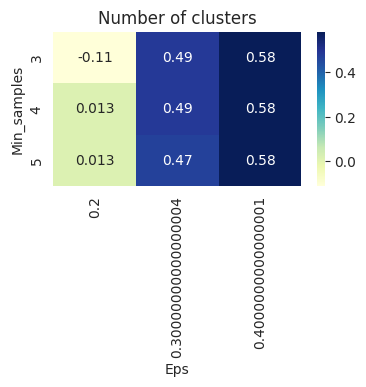

In [240]:
tmp1['Silhoutte_Score1'] = sil_score1

pivot_norm = pd.pivot_table(tmp1, values='Silhoutte_Score1', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(4,2))

sns.heatmap(pivot_norm, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)

ax.set_title('Number of clusters')
print('A heatplot below shows Silhoutte Score genreated by the algorithm for the respective parameters combinations.')
plt.show()

In [254]:
tmp1

,Eps,Min_samples,No_of_clusters,Silhoutte_Score1
0,0.2,3,6,-0.113808
1,0.2,4,3,0.012783
2,0.2,5,3,0.012783
3,0.3,3,5,0.485424
4,0.3,4,5,0.485424
5,0.3,5,4,0.468321
6,0.4,3,5,0.583570
7,0.4,4,5,0.583570
8,0.4,5,5,0.583570


As we can see,

*   The silhoutte score is 58% which is the highest when no_of_clusters is 5. So lets take a eps value & min sample where no_of_clusters is 5 and silhoutte_score is 0.583
*   The silhoutte score the better in Normalised data than the standardised one. So lets fix this as the final DBSCAN model.




In [242]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps= 0.4, min_samples= 4)                           
final_db_cluster = db.fit_predict(norm_df)
final_db_cluster

array([ 0, -1,  1,  2,  1,  1,  2,  2,  1,  0,  2,  3,  1,  2,  3,  2,  2,
        0,  3,  1,  2,  1,  2,  0,  1,  3,  3,  1,  3,  2,  1,  1,  0,  3,
        2,  2,  2,  2,  2,  0,  3,  0,  1,  2,  3,  2,  2,  3,  2,  2])

In [243]:
silhouette_score(norm_df, labels = final_db_cluster)

0.5835699717375399

In [244]:
df['Cluster_DB'] = final_db_cluster

In [245]:
df.head(2)

,States,Murder,Assault,UrbanPop,Rape,Cluster_HC,Cluster_KM,Cluster_KM1,Cluster_DB
0,Alabama,13.2,236,58,21.2,0,0,3,0
1,Alaska,10.0,263,48,44.5,0,0,3,-1


In [246]:
df.groupby('Cluster_DB').agg('mean')

,Murder,Assault,UrbanPop,Rape,Cluster_HC,Cluster_KM,Cluster_KM1
Cluster_DB,,,,,,,
-1,10.000000,263.000000,48.000000,44.500000,0.000000,0.0,3.0
0,14.671429,251.285714,54.285714,21.685714,0.000000,0.0,3.0
1,10.883333,256.916667,78.333333,32.250000,1.916667,0.0,2.0
2,5.715000,132.300000,70.800000,18.100000,1.000000,0.0,0.0
3,3.180000,78.700000,49.300000,11.630000,3.000000,1.0,1.0


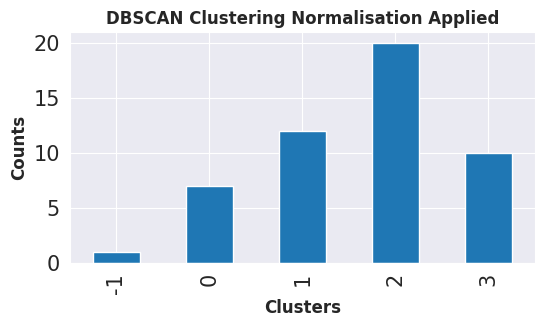

In [247]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(6, 3))

df.groupby(['Cluster_DB']).count()['States'].plot(kind='bar')             #can use any column with unique values to count, since I dropped Id col, i'm using balance col to count

plt.title('DBSCAN Clustering Normalisation Applied',fontsize='large',fontweight='bold')

ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()


<Axes: xlabel='Cluster_DB', ylabel='Murder'>

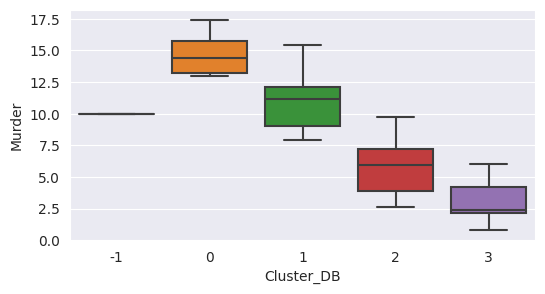

In [248]:
plt.figure(figsize=(6,3))
sns.boxplot(x='Cluster_DB', y='Murder', data=df)


<Axes: xlabel='Cluster_DB', ylabel='Assault'>

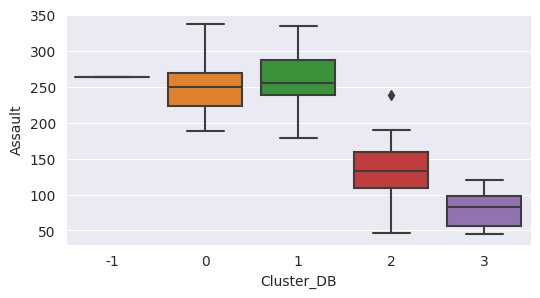

In [249]:
plt.figure(figsize=(6,3))
sns.boxplot(x='Cluster_DB', y='Assault', data=df)

<Axes: xlabel='Cluster_DB', ylabel='Rape'>

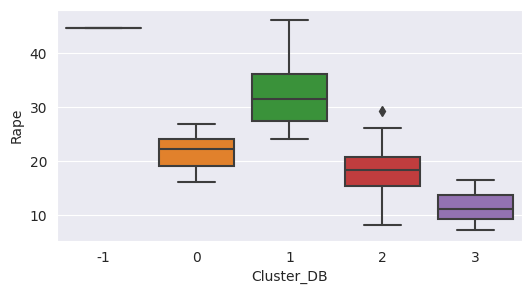

In [250]:
plt.figure(figsize=(6,3))
sns.boxplot(x='Cluster_DB', y='Rape', data=df)

**Inference:**

According to DBSCAN as we can see,


Ignoring the outliers(cluster -1),
*   The States in Cluster 2 & 3 seems to be in Safe-Zone where there are relativley less Murders,Assaults and Rapes
*   The States in Cluster 0 & 1 seems to have higher crime rates and can be regarded as Danger-Zone.

